# Ideas

- Andere Modelle ausprobieren 
- Grid Search

## Flo changes:
- Created dummy variable for home_type 
- Impute year_built (avg_bauperiode)
- Impute NA with average for micro rating - we can still remove the features, just in case 
- Outliers cleaned - 2 or 3 standard deviations - based on price_m2 (to account both for price and size)
- Added additional models - include cross-validation -> normalization still to be added into pipeline 
- Different features per model: for example no lon, lat for linear regression 

# Imports for Data Handling

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


# Data Import

In [60]:
# First Setup

# Load data

# Train Data
#file_path = 'data/training_data.csv'

# Test Data
file_path = 'data/X_test.csv'

data = pd.read_csv(file_path)

# make sure pd show all columns
pd.set_option('display.max_columns', None)

print(f"DF shape: {data.shape}")

data.head()


DF shape: (18001, 94)


/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/3239242565.py:11: DtypeWarning: Columns (24,25,30,37,43,48,51,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Unnamed: 0    GDENAMK  GDENR KTKZ                               address  \
0           1       Lyss    306   BE      Kirchenfeldstrasse 23, 3250 Lyss   
1           2  Epalinges   5584   VD       Grand Chemin 35, 1066 Epalinges   
2           3       Bern    351   BE         Schlossstrasse 102, 3008 Bern   
3           4    Goldach   3213   SG  Haini-Rennhasstrasse 6, 9403 Goldach   
4           5      Bulle   2125   FR          Rue des Agges, 1630 Bulle FR   

   appartments   area  area_useable  balcony  basement  bath  bath_tube  \
0          NaN   46.0           NaN      1.0       NaN   NaN        NaN   
1          NaN   60.0           NaN      NaN       NaN   NaN        NaN   
2          NaN    NaN           NaN      NaN       NaN   NaN        NaN   
3          NaN  115.0           NaN      1.0       NaN   NaN        NaN   
4          NaN   16.0           NaN      1.0       NaN   NaN        NaN   

   cabletv  ceiling  cheminee        date  \
0      1.0      NaN       NaN  07.11.2019   
1      NaN      NaN       NaN  27.02.2019   
2      NaN      NaN       NaN  06.09.2019   
3      NaN      NaN       NaN  05.04.2019   
4      1.0      NaN       NaN  06.06.2019   

                                               descr  dishwasher  dryer  \
0  Wir vermieten ab 1. Februar 2020 eine kleine a...         NaN    NaN   
1                                                NaN         NaN    NaN   
2  Das Mehrfamilienhaus ohne Lift befindet sich a...         NaN    NaN   
3  Besuchen Sie unseren Abend der offenen Tür  an...         NaN    NaN   
4  A louer en colocation dès le 1er août. Une cha...         NaN    NaN   

   elevator  floors  furnished  garden_m2  gardenshed heating_air  \
0       NaN     1.0        NaN        NaN         NaN         NaN   
1       NaN     NaN        NaN        NaN         NaN         NaN   
2       NaN     1.0        NaN        NaN         NaN         NaN   
3       1.0     3.0        NaN        NaN         NaN         NaN   
4       NaN     1.0        NaN        NaN         NaN         NaN   

  heating_earth  heating_electro heating_far  heating_gas  heating_oil  \
0           NaN              NaN         NaN          NaN          NaN   
1           NaN              NaN         NaN          NaN          NaN   
2           NaN              NaN         NaN          NaN          NaN   
3           NaN              NaN         NaN          NaN          NaN   
4           NaN              NaN         NaN          NaN          NaN   

  heating_pellets home_type  kids_friendly        lat  laundry       lon  \
0             NaN   Wohnung            NaN  47.068830      NaN  7.305784   
1             NaN   Wohnung            NaN  46.555584      NaN  6.684483   
2             NaN   Wohnung            NaN  46.944500      NaN  7.413995   
3             NaN   Wohnung            NaN  47.478105      NaN  9.464342   
4             NaN   Wohnung            NaN  46.612449      NaN  7.043609   

   manlift middle_house  minergie  month  msregion  newly_built  oldbuilding  \
0      NaN          NaN       NaN     11        12            0          1.0   
1      NaN          NaN       NaN      2        84            0          NaN   
2      NaN          NaN       NaN      9        11            0          NaN   
3      NaN          NaN       NaN      4        53            0          NaN   
4      NaN          NaN       NaN      6        40            0          NaN   

  oven  parking_indoor  parking_outside  pets  playground pool  \
0  NaN             NaN              NaN   NaN         NaN  NaN   
1  NaN             NaN              NaN   NaN         NaN  NaN   
2  NaN             NaN              NaN   NaN         NaN  NaN   
3  NaN             1.0              NaN   NaN         NaN  NaN   
4  NaN             1.0              1.0   NaN         NaN  NaN   

   quarter_general  quarter_specific quiet  raised_groundfloor  rooms  \
0                4            4.2019   NaN                 NaN    2.5   
1                1  

# Data Exploration

In [61]:
# Data Overview

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18001 entries, 0 to 18000
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      18001 non-null  int64  
 1   GDENAMK                         18001 non-null  object 
 2   GDENR                           18001 non-null  int64  
 3   KTKZ                            18001 non-null  object 
 4   address                         18001 non-null  object 
 5   appartments                     0 non-null      float64
 6   area                            14485 non-null  float64
 7   area_useable                    1267 non-null   float64
 8   balcony                         8635 non-null   float64
 9   basement                        274 non-null    float64
 10  bath                            121 non-null    float64
 11  bath_tube                       0 non-null      float64
 12  cabletv                         

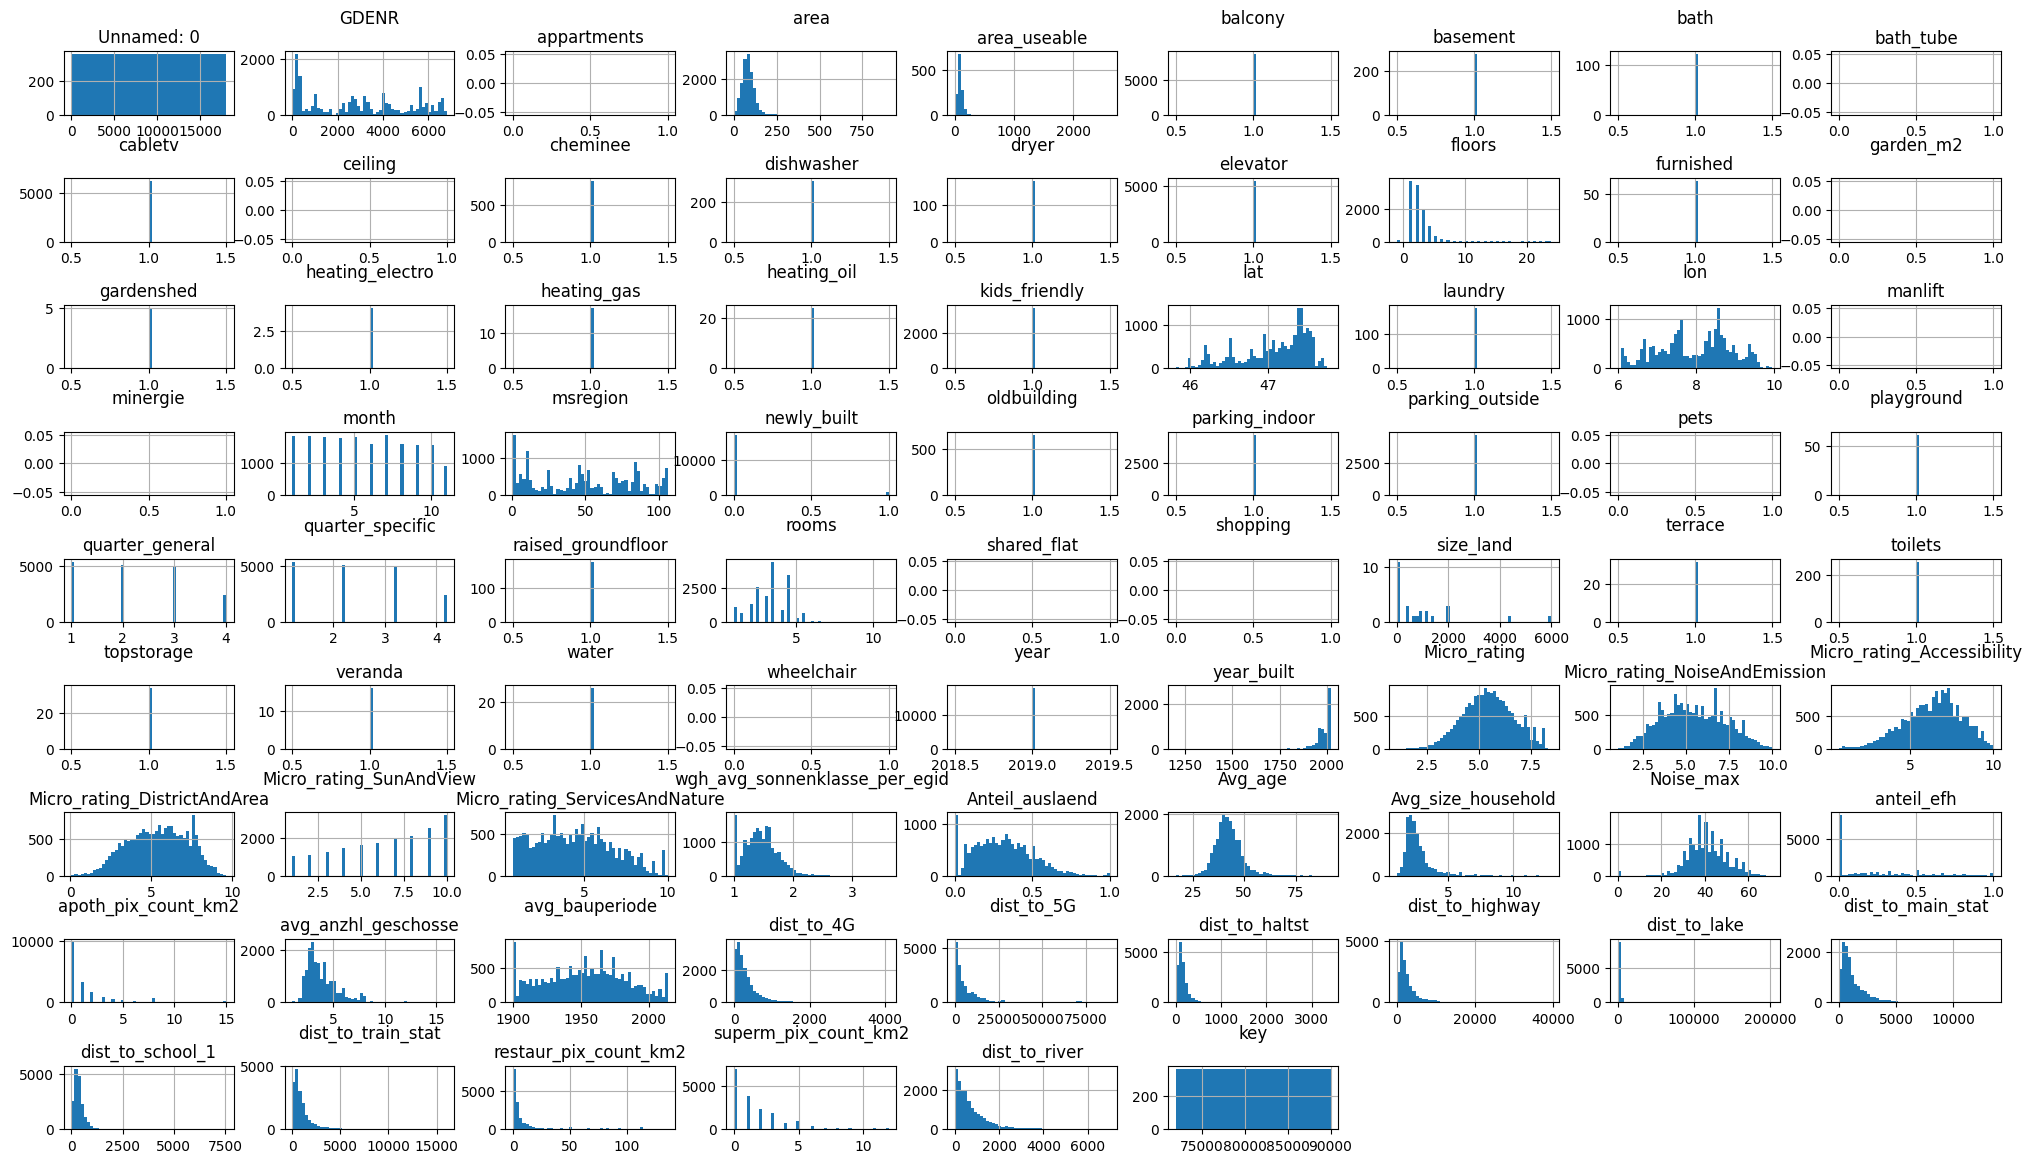

In [62]:
# Graphical Overview

axes = data.hist(bins=50, figsize=(25, 14))
plt.subplots_adjust(hspace=1)

# Iterate through the generated axes and adjust every second title
for i, ax in enumerate(axes.flatten()):
    if i % 2 == 1:
        title = ax.get_title()
        ax.set_title(title, pad=20) # pad: distance between title and plot

plt.show()


# Data Cleaning

## Simple Imputations & One-Hot-Encoding

In [63]:
# ONLY IN TRAINING DATA
# We drop manlift because it is not available in the test data
data.drop(columns=['manlift'], inplace=True)


In [64]:
# Delete all columns with only one value inside

for key in data.columns.tolist():
    if data[f"{key}"].unique().shape[0] == 1:
        data.drop(f"{key}", axis=1, inplace=True)


In [65]:
# Drop columns that are not valuable to regression

low_val_list = ['Unnamed: 0', 'descr', 'GDENAMK', 'GDENR',
                 'KTKZ', 'address',  'date', 'quarter_general', 'quarter_specific',
                   'month', 'dist_to_lake', 'dist_to_main_stat']
data.drop(columns=low_val_list, inplace=True)


In [66]:
# Impute NaN with 0


nan0_list = ['balcony', 'basement', 'cabletv', 'cheminee', 'dishwasher', 'dryer',
             'elevator', 'furnished', 'gardenshed', 'heating_air', 'heating_earth',
             'heating_far', 'heating_electro', 'heating_gas', 'heating_oil', 'heating_pellets',
             'kids_friendly', 'laundry', 'middle_house', 'oldbuilding',
             'oven', 'parking_indoor', 'parking_outside', 'playground', 'pool',
             'quiet', 'raised_groundfloor', 'shower', 'size_land', 'sunny', 'terrace',
             'topstorage', 'veranda', 'water']
data.update({item: data[item].fillna(0) for item in nan0_list})

# Impute NaN with 1

nan1_list = ['bath', 'floors', 'toilets']
data.update({item: data[item].fillna(1) for item in nan1_list})


In [67]:
# Impute NaNs by mean value for columns with only limited missing values

columns_to_process = ['Anteil_auslaend', 'Avg_age', 'Avg_size_household',
                      'anteil_efh', 'wgh_avg_sonnenklasse_per_egid',
                      'avg_anzhl_geschosse', 'avg_bauperiode',
                      'dist_to_school_1', 'dist_to_haltst']

for column in columns_to_process:

    # Replace with mean by msregion
    mean_by_msregion = data.groupby('msregion')[column].transform('mean')

    # Replace missing values in the current column with the corresponding mean of the 'msregion'
    data[column] = data[column].fillna(mean_by_msregion)


In [68]:
#Create One-Hote-Encoding for home_type and msregion

data['home_type'] = data['home_type'].astype('category')
data['msregion'] = data['msregion'].astype('category')

data = pd.get_dummies(data, columns=['home_type'], prefix='home')
data = pd.get_dummies(data, columns=['msregion'], prefix='msregion')


In [69]:
# Convert binary columns to numeric

column_list = ['heating_air', 'heating_earth', 'heating_far', 'heating_pellets',
               'middle_house', 'oven', 'pool', 'quiet', 'shower', 'sunny']

for column in column_list:
    data[column] = pd.to_numeric(data[column], errors='coerce').astype('int')


## Complex Imputations

### Min_area

In [70]:
# Create a new column "min_area" being the minimum of area and area_usable

data['min_area'] = np.fmin(data['area'], data['area_useable'])

# Check for NaN values in min_area
print(data[data['min_area'].isna()].shape)
data[data['min_area'].isna()].head()

data.drop(columns=['area', 'area_useable'], inplace=True)



(3334, 183)


In [71]:
print(data[data['min_area'].isna()].shape)


(3334, 181)


In [72]:
# Standardize lat and lon
data[['lat', 'lon']] = StandardScaler().fit_transform(data[['lat', 'lon']])

# Initialize NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=200)
neighbors.fit(data[['lat', 'lon']])

# Iterate over rows with NaN 'min_area'
for idx, row in data[data['min_area'].isna()].iterrows():
    distances, indices = neighbors.kneighbors([row[['lat', 'lon']]])
    relevant_indices = indices.flatten()

    # Filter neighbors with the same number of rooms
    same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]

    # Calculate average 'min_area' from these neighbors
    avg_min_area = same_room_neighbors['min_area'].mean()

    # Impute the 'min_area'
    data.at[idx, 'min_area'] = avg_min_area

# Iterate over rows with NaN 'year_built'
for idx, row in data[data['year_built'].isna()].iterrows():
    distances, indices = neighbors.kneighbors([row[['lat', 'lon']]])
    relevant_indices = indices.flatten()

    # Calculate the average 'year_built' from these neighbors
    avg_year_built = data.iloc[relevant_indices]['year_built'].mean()

    # Impute the 'year_built'
    data.at[idx, 'year_built'] = avg_year_built

# Fill remaining missing 'year_built' values with 'avg_bauperiode'
data['year_built'].fillna(data['avg_bauperiode'], inplace=True)


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/3799024048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/3799024048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with f

In [73]:
# There are still a lot of missing values in rooms (the ones where min_area is not NaN)

data[data['rooms'].isna()].shape


(460, 181)

In [74]:
# Imputing rooms

# Modify bins to include np.inf for an open-ended last bin
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, np.inf]

# Adjust labels to include an 'Over' label for the open-ended bin
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"Over {bins[-2]}"]

# Apply the cut function to create the 'area_group' column
data['area_group'] = pd.cut(data['min_area'], bins=bins, labels=labels)

# Step 2: Group by 'area_group' and calculate the mean of 'rooms'
mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()

# Step 3: Replace NaN values in 'rooms' with the mean rooms of the corresponding 'area_group'
data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))

# Rows with min_area over 300 don't have room numbers listed so we try an educated guess

# Step 4: Filter the dataset for 'min_area' between 200 and 300
group_200_to_300 = data[(data['min_area'] >= 200) & (data['min_area'] < 300)]

# Calculate the average rooms per square meter for this group
avg_rooms_per_sqm_200_to_300 = (group_200_to_300['rooms'] / group_200_to_300['min_area']).dropna().mean()

# Step 5: Apply this average rooms per square meter to estimate the room number for larger estates with 'min_area' over 300
data.loc[data['min_area'] > 300, 'rooms'] = data['min_area'] * avg_rooms_per_sqm_200_to_300

# Round for all rooms to .5
data['rooms'] = data['rooms'].apply(lambda x: np.round(x * 2) / 2)

# Drop area_group column
data.drop(['area_group'], axis=1, inplace=True)


/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/2914017314.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/2914017314.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))


In [75]:
#Imputing missing values for min_area by using the average min_area
# of the 200 nearest neighbors with the same number of rooms

# Standardizing lat and lon
data[['lat', 'lon']] = StandardScaler().fit_transform(data[['lat', 'lon']])

# Initialize NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=200)
neighbors.fit(data[['lat', 'lon']])

# Iterate over rows with NaN 'min_area'
for idx, row in data[data['min_area'].isna()].iterrows():
    distances, indices = neighbors.kneighbors([row[['lat', 'lon']]])
    relevant_indices = indices.flatten()

    # Filter neighbors with the same number of rooms
    same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]

    # Calculate average 'min_area' from these neighbors
    avg_min_area = same_room_neighbors['min_area'].mean()

    # Impute the 'min_area'
    data.at[idx, 'min_area'] = avg_min_area


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/1888449172.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/1888449172.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with f

### ONLY IN TRAINING DATA: Delete outliers in price m2

In [50]:
# Check for NaN values in min_area and rooms

print(data[data['min_area'].isna() & data['rooms'].isna()].shape)

# If rooms is not available either, drop the row
data = data.drop(data[(data['min_area'].isna()) & (data['rooms'].isna())].index)


(789, 182)


In [51]:
# Delete observations smaller than 20 m2
data = data[data['min_area'] >= 20]


In [52]:
# Create price_m2 column
data['price_m2'] = data['rent_full'] / data['min_area']

# Create copy to compare data before and after outlier removal
data_with_outliers = data.copy()

In [53]:
# Clean outliers - num_std * standard deviation from mean of price_m2

num_std = 2

columns_to_clean_std = ['price_m2']

for column in columns_to_clean_std:

    if column == 'price_m2':
        data['price_m2'] = np.log1p(data['price_m2']) # to account for skewness

    # Calculate mean and standard deviation
    mean_value = data[column].mean()
    print(f'Mean Value of {column} is {np.expm1(mean_value)}')
    std_value = data[column].std()
    print(f'Std Deviation of {column} is {np.expm1(std_value)}')

    # Calculate the number of values more than 3 standard deviations away from the mean
    num_outliers = ((data[column] - mean_value).abs() > num_std * std_value).sum()
    print(f"Number of values more than 3 standard deviations away from the mean in {column}:", num_outliers, "-> have been dropped")

    # Drop rows where the value is more than 2 standard deviations away from the mean
    data = data[(data[column] - mean_value).abs() <= num_std * std_value]

    print()

data['price_m2'] = np.expm1(data['price_m2']) #retransform price_m2

# Display the cleaned DataFrame
print("Shape of DataFrame after cleaning:", data.shape)
### ONLY FOR TRAINING DATA: Delete price per m2 outliers
# Check for NaN values in min_area and rooms

print(data[data['min_area'].isna() & data['rooms'].isna()].shape)

# If rooms is not available either, drop the row
data = data.drop(data[(data['min_area'].isna()) & (data['rooms'].isna())].index)

# Create price_m2 column
data['price_m2'] = data['rent_full'] / data['min_area']

# Clean outliers - num_std * standard deviation from mean of price_m2

num_std = 2

columns_to_clean_std = ['price_m2']

for column in columns_to_clean_std:

    if column == 'price_m2':
        data['price_m2'] = np.log1p(data['price_m2']) # to account for skewness

    # Calculate mean and standard deviation
    mean_value = data[column].mean()
    print(f'Mean Value of {column} is {np.expm1(mean_value)}')
    std_value = data[column].std()
    print(f'Std Deviation of {column} is {np.expm1(std_value)}')

    # Calculate the number of values more than 3 standard deviations away from the mean
    num_outliers = ((data[column] - mean_value).abs() > num_std * std_value).sum()
    print(f"Number of values more than 3 standard deviations away from the mean in {column}:", num_outliers, "-> have been dropped")

    # Drop rows where the value is more than 2 standard deviations away from the mean
    data = data[(data[column] - mean_value).abs() <= num_std * std_value]

    print()

data['price_m2'] = np.expm1(data['price_m2']) #retransform price_m2

# Display the cleaned DataFrame
print("Shape of DataFrame after cleaning:", data.shape)


Mean Value of price_m2 is 20.748717269644104
Std Deviation of price_m2 is 0.3460613892469795
Number of values more than 3 standard deviations away from the mean in price_m2: 3448 -> have been dropped

Shape of DataFrame after cleaning: (67041, 183)
(0, 183)
Mean Value of price_m2 is 20.54643954909215
Std Deviation of price_m2 is 0.2760000760260274
Number of values more than 3 standard deviations away from the mean in price_m2: 3143 -> have been dropped

Shape of DataFrame after cleaning: (63898, 183)


## Data Exploration after Cleaning

In [54]:
# Count rows with NaN values

nan_list = data.isna().sum()

# Check for NaNs

pd.set_option('display.max_rows', None)
nan_list


balcony                           0
basement                          0
bath                              0
cabletv                           0
cheminee                          0
dishwasher                        0
dryer                             0
elevator                          0
floors                            0
furnished                         0
gardenshed                        0
heating_air                       0
heating_earth                     0
heating_electro                   0
heating_far                       0
heating_gas                       0
heating_oil                       0
heating_pellets                   0
kids_friendly                     0
lat                               0
laundry                           0
lon                               0
middle_house                      0
newly_built                       0
oldbuilding                       0
oven                              0
parking_indoor                    0
parking_outside             

In [55]:
# display distribution to identify outliers or 0 values

print('-' * 30)
columns_of_interest = ['rent_full','min_area', 'price_m2', 'year_built', 'lat', 'lon']

for column in columns_of_interest:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Print column name, minimum, maximum, mean, and standard deviation values
        print(f"Column: {column}")
        print(f"Minimum Value: {data[column].min()}")
        print(f"Maximum Value: {data[column].max()}")
        print(f"Mean Value: {data[column].mean()}")
        print(f"Standard Deviation: {data[column].std()}")

        print("=" * 30)


------------------------------
Column: rent_full
Minimum Value: 280
Maximum Value: 7000
Mean Value: 1683.0192181288928
Standard Deviation: 621.1906422251863
Column: min_area
Minimum Value: 20.0
Maximum Value: 360.0
Mean Value: 82.94050777340408
Standard Deviation: 29.85355797691635
Column: price_m2
Minimum Value: 12.23404255319149
Maximum Value: 34.078947368421055
Mean Value: 20.93639903135108
Standard Deviation: 4.865196303834649
Column: year_built
Minimum Value: 1087.0
Maximum Value: 2021.0
Mean Value: 1982.7778035404922
Standard Deviation: 34.2675506385915
Column: lat
Minimum Value: -2.8176201075247977
Maximum Value: 1.6552817855579265
Mean Value: 0.032448033084524514
Standard Deviation: 0.9801649360269251
Column: lon
Minimum Value: -2.1691060002301765
Maximum Value: 2.2121547315748646
Mean Value: 0.03314445305531295
Standard Deviation: 0.977946659953398


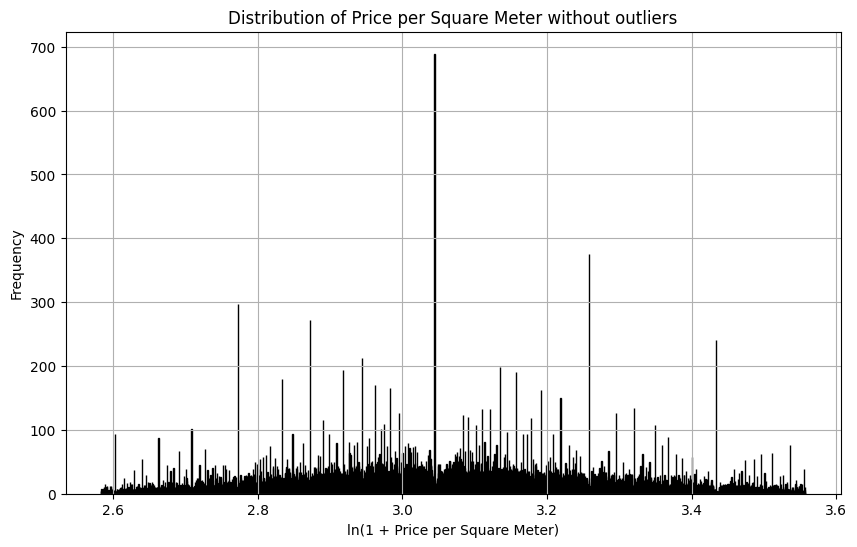

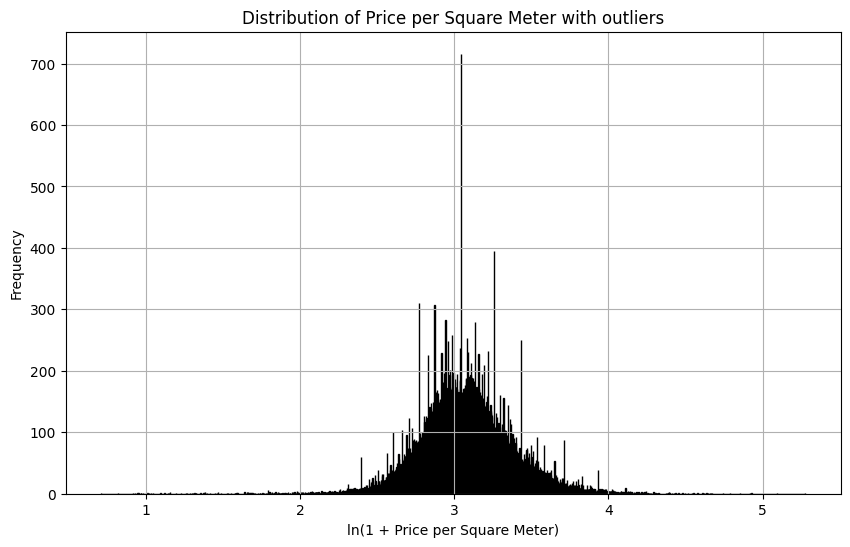

In [56]:
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(np.log1p(data['price_m2']), bins=3000, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Price per Square Meter without outliers')
plt.xlabel('ln(1 + Price per Square Meter)')
plt.ylabel('Frequency')

# Optional: Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(np.log1p(data_with_outliers['price_m2']), bins=3000, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Price per Square Meter with outliers')
plt.xlabel('ln(1 + Price per Square Meter)')
plt.ylabel('Frequency')

# Optional: Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()



/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_44016/3456137759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_m2', y='Dataset', data=combined_data, notch=True, palette='Set2')


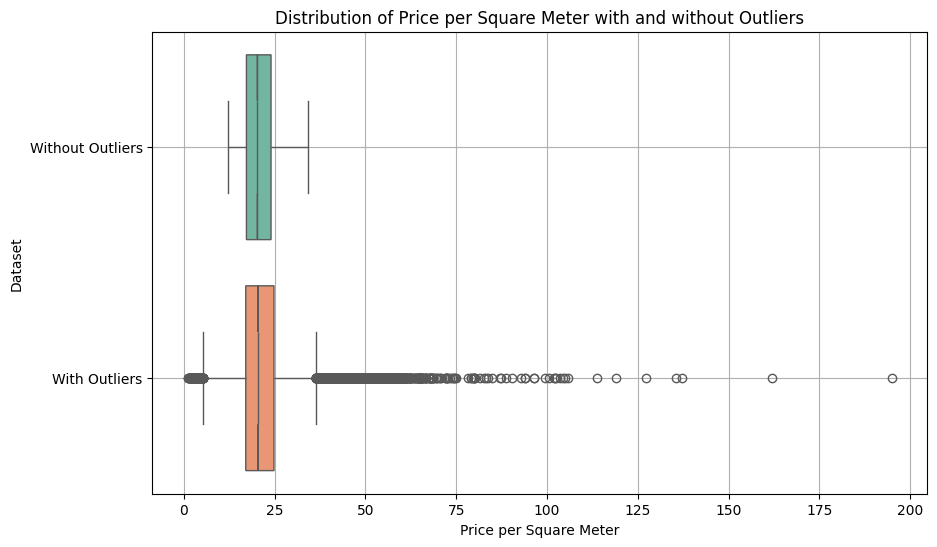

In [57]:
# Creating a combined DataFrame with a label to distinguish between with and without outliers
combined_data = pd.DataFrame({
    'price_m2': np.concatenate((data['price_m2'], data_with_outliers['price_m2'])),
    'Dataset': ['Without Outliers']*len(data) + ['With Outliers']*len(data_with_outliers)
})

plt.figure(figsize=(10, 6))

# Create a boxplot using seaborn
sns.boxplot(x='price_m2', y='Dataset', data=combined_data, notch=True, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Price per Square Meter with and without Outliers')
plt.xlabel('Price per Square Meter')

# Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


## Correlation Analysis

In [25]:
# Compute the correlation matrix
corr = data.corr()

# Define a threshold for identifying significant correlations
threshold = 0.5

# Initialize an empty list to store pairs of correlated variables
highly_correlated_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))

# Sort the list of highly correlated pairs by correlation, from highest to lowest
highly_correlated_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the list of highly correlated variable pairs
for pair in highly_correlated_pairs:
    print(f"Variables '{pair[0]}' and '{pair[1]}' have a correlation of {pair[2]:.2f}")


Variables 'laundry' and 'dryer' have a correlation of 0.97
Variables 'min_area' and 'rooms' have a correlation of 0.83
Variables 'restaur_pix_count_km2' and 'apoth_pix_count_km2' have a correlation of 0.81
Variables 'Noise_max' and 'Micro_rating_NoiseAndEmission' have a correlation of 0.81
Variables 'min_area' and 'rent_full' have a correlation of 0.79
Variables 'sunny' and 'quiet' have a correlation of 0.79
Variables 'superm_pix_count_km2' and 'apoth_pix_count_km2' have a correlation of 0.78
Variables 'wgh_avg_sonnenklasse_per_egid' and 'Micro_rating_SunAndView' have a correlation of 0.77
Variables 'Micro_rating_DistrictAndArea' and 'Micro_rating' have a correlation of 0.75
Variables 'dishwasher' and 'basement' have a correlation of 0.72
Variables 'Micro_rating_ServicesAndNature' and 'Micro_rating' have a correlation of 0.71
Variables 'superm_pix_count_km2' and 'restaur_pix_count_km2' have a correlation of 0.69
Variables 'msregion_82' and 'dist_to_5G' have a correlation of 0.68
Variab

In [26]:
# Initialize sets to store unique features from highly correlated pairs
features_in_high_corr = set()

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            features_in_high_corr.add(corr.columns[i])
            features_in_high_corr.add(corr.columns[j])

# Convert the set to a list
list_of_features = list(features_in_high_corr)

# Print the list of features
print("Features in highly correlated pairs:")
for feature in list_of_features:
    print(feature)

Features in highly correlated pairs:
apoth_pix_count_km2
home_Wohnung
msregion_82
laundry
sunny
Noise_max
basement
Micro_rating_SunAndView
Micro_rating
dishwasher
dryer
Micro_rating_ServicesAndNature
dist_to_river
anteil_efh
restaur_pix_count_km2
superm_pix_count_km2
Micro_rating_DistrictAndArea
lat
avg_anzhl_geschosse
Micro_rating_NoiseAndEmission
quiet
rooms
home_Dachwohnung
rent_full
wgh_avg_sonnenklasse_per_egid
lon
min_area
dist_to_5G
msregion_87
Micro_rating_Accessibility


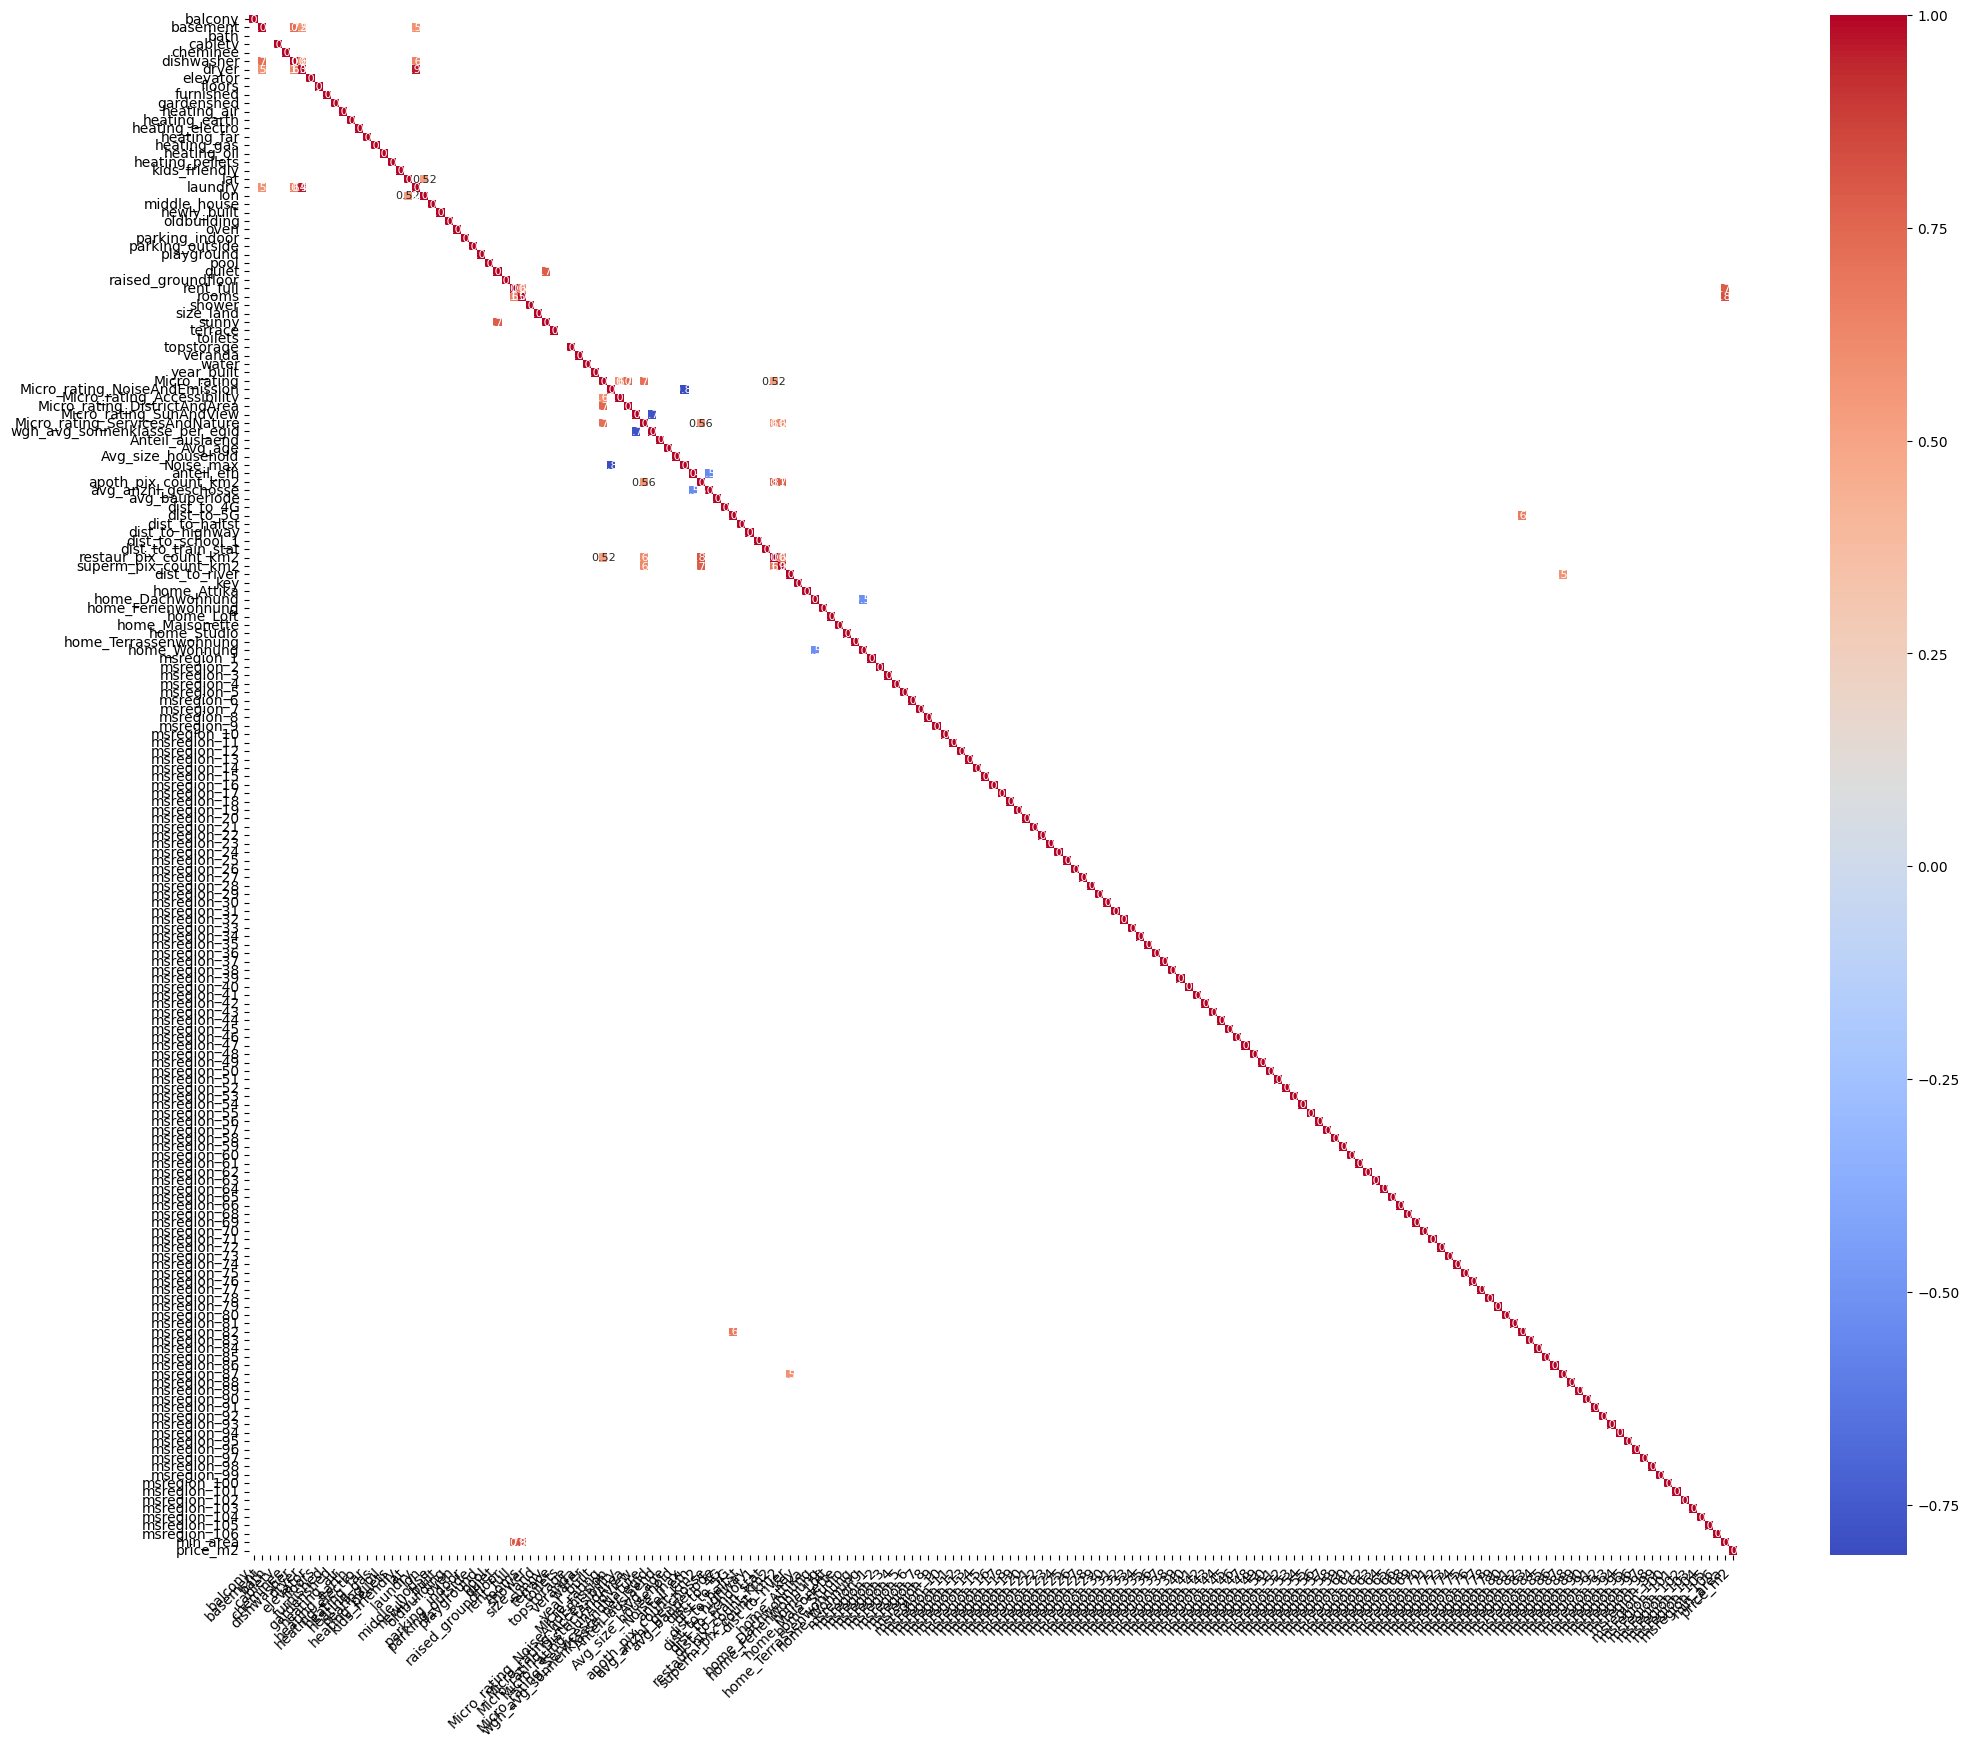

In [27]:
plt.figure(figsize=(24, 20))

# Create a mask to display only significant correlations (e.g., abs(corr) > 0.5)
# Adjust the threshold
mask = np.abs(corr) < 0.5

# Generate a heatmap with annotations for significant correlations only
sns.heatmap(corr, 
            mask=mask,  # Mask for non-significant correlations
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,  # Annotate significant correlations
            cmap='coolwarm',  # Color scheme
            fmt=".2f",  # Formatting the annotated text
            annot_kws={"size": 8})  # Font size of annotations

# Improve the readability of the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)

plt.show()


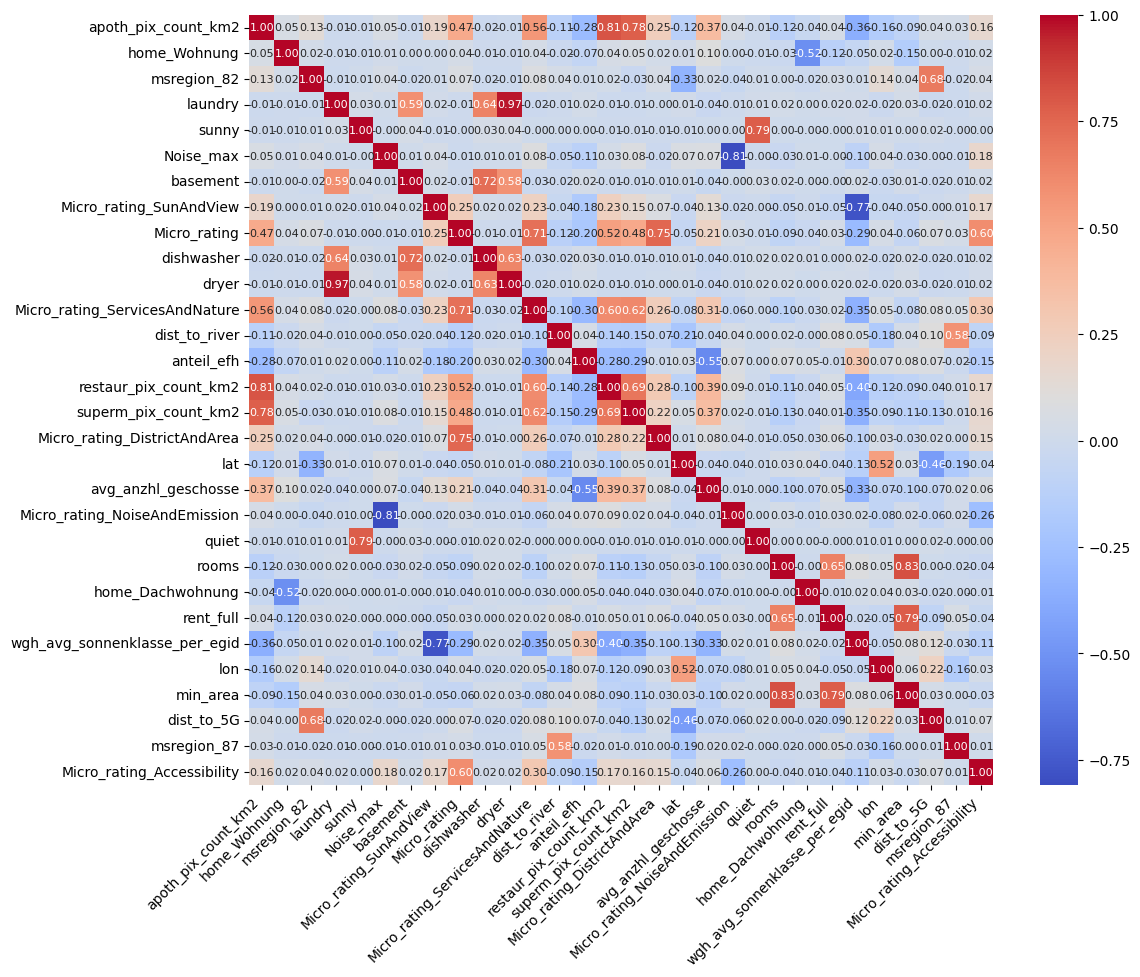

In [28]:
# Filter the correlation matrix to include only the features in list_of_features
filtered_corr = corr.loc[list_of_features, list_of_features]

plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Generate a heatmap for the filtered correlation matrix
sns.heatmap(filtered_corr, 
            annot=True,  # Annotate with the correlation coefficients
            cmap='coolwarm',  # Color scheme
            fmt=".2f",  # Formatting the annotated text
            annot_kws={"size": 8})  # Font size of annotations

# Improve the readability of the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)

plt.show()


In [29]:
# Remove highly correlated Features

data.drop(columns=['dryer', 'Noise_max'], inplace=True)


## Save the prepared Data

In [76]:
#data.to_csv('data/prep_train_2std.csv', index=False)
#data.to_csv('data/prep_train_3std.csv', index=False)
data.to_csv('data/prep_test.csv', index=False)


In [256]:
# train_data_2std = data.copy()
train_data_3std = data.copy()
# test_data = data.copy()


In [257]:
print(train_data_2std.shape)
print(train_data_3std.shape)
print(test_data.shape)


(68382, 78)
(70540, 78)
(18001, 77)


In [78]:
train_data = pd.read_csv('data/prep_train_2std.csv')
test_data = pd.read_csv('data/prep_test.csv')

train_data = train_data.drop(['key', 'price_m2','dryer', 'Noise_max'], axis=1)
test_data = test_data.drop(['key','dryer', 'Noise_max'], axis=1)




In [79]:
# Check for column-mismatches in test_data and train_data

train_columns = set(train_data.columns.tolist())
test_columns = set(test_data.columns.tolist())

# Find the columns that are in train_data but not in test_data
columns_missing_in_test = train_columns - test_columns

# Find the columns that are in test_data but not in train_data
columns_missing_in_train = test_columns - train_columns

# Print the mismatched columns
if columns_missing_in_test:
    print("Columns missing in test_data but present in train_data:")
    print(columns_missing_in_test)

if columns_missing_in_train:
    print("Columns missing in train_data but present in test_data:")
    print(columns_missing_in_train)


Columns missing in test_data but present in train_data:
{'rent_full'}


### Impute missing min_area and rooms to test_data

In [80]:
# Calculate the average values for "average_rooms" and "min_area" from non-missing data
average_rooms_mean = train_data["rooms"].mean()
min_area_mean = train_data["min_area"].mean()

# For test_data DataFrame, use the same means for imputation
test_data["rooms"].fillna(average_rooms_mean, inplace=True)
test_data["min_area"].fillna(min_area_mean, inplace=True)


## Disclaimer:
Since we're going to focus on decision trees and random forest, we don't nee to
standardize or normalize our data.

# Different models 

## Imports for Predictions

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import pickle
from xgboost import XGBRegressor, plot_importance


In [120]:
pd.set_option('display.max_columns', None)
train_data.head(5)
train_data.shape[1]

77

## Linear Regression

Mean Cross-Validated MSE: 194001.4891128248
Standard Deviation of Cross-Validated MSE: 4165.305549337856
Root Mean Squared Error: 435.40268780068527
R^2 Score: 0.5529215916810974
Average Predicted Rent (Test Data): 1681.0975385265306
Average Predicted Rent (Test Data DataFrame): 1672.2370133100148


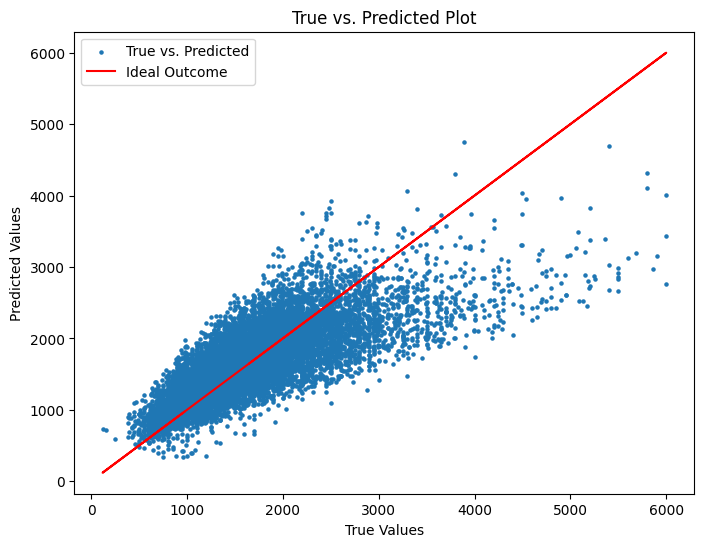

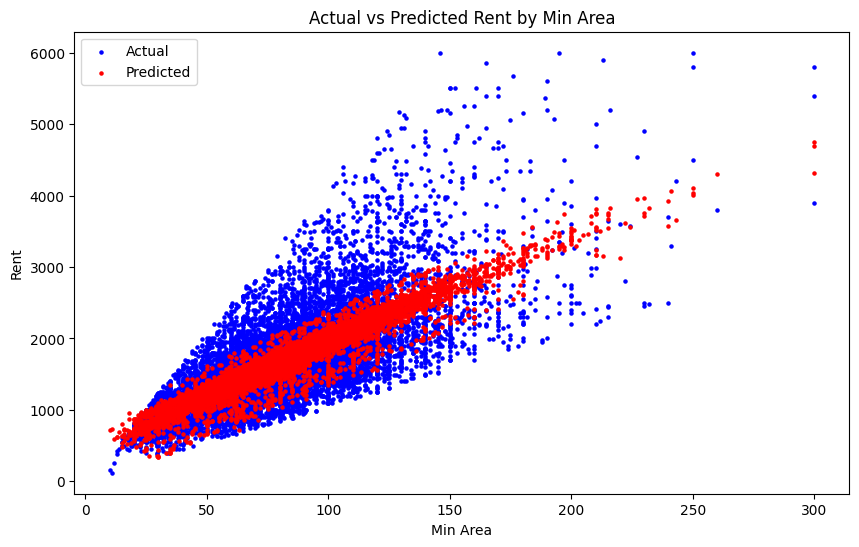

In [117]:
data_copy = train_data.copy()

data_copy = data_copy[['rent_full', 'min_area', 'home_Attika', 'elevator', 'dist_to_5G', 'rooms', 'Micro_rating_NoiseAndEmission', 'year_built']]
test_data = test_data[['min_area', 'home_Attika', 'elevator', 'dist_to_5G', 'rooms', 'Micro_rating_NoiseAndEmission', 'year_built']]


# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LinearRegression()

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Calculate the average of rent_full over the predicted values for train_data
average_predicted_rent_train = np.mean(y_pred)
print(f'Average Predicted Rent (Test Data): {average_predicted_rent_train}')

# Predict rent_full on the test_data DataFrame
y_test_data_pred = model.predict(test_data)

# Calculate the average of rent_full over the predicted values for test_data
average_predicted_rent_test = np.mean(y_test_data_pred)
print(f'Average Predicted Rent (Test Data DataFrame): {average_predicted_rent_test}')

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()



# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6304
[LightGBM] [Info] Number of data points in the train set: 45145, number of used features: 66
[LightGBM] [Info] Start training from score 1684.101562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6301
[LightGBM] [Info] Number of data points in the train set: 45145, number of used features: 66
[LightGBM] [Info] Start training from score 1684.299036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6312
[LightGBM] [Info] Number of data points in the tra

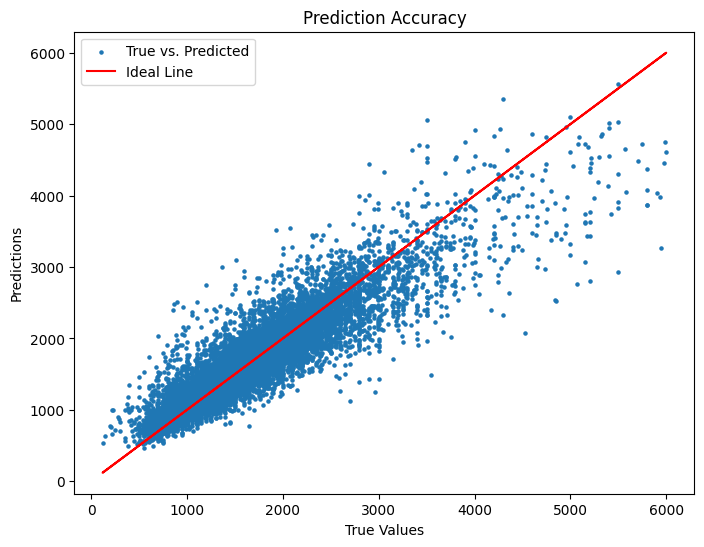

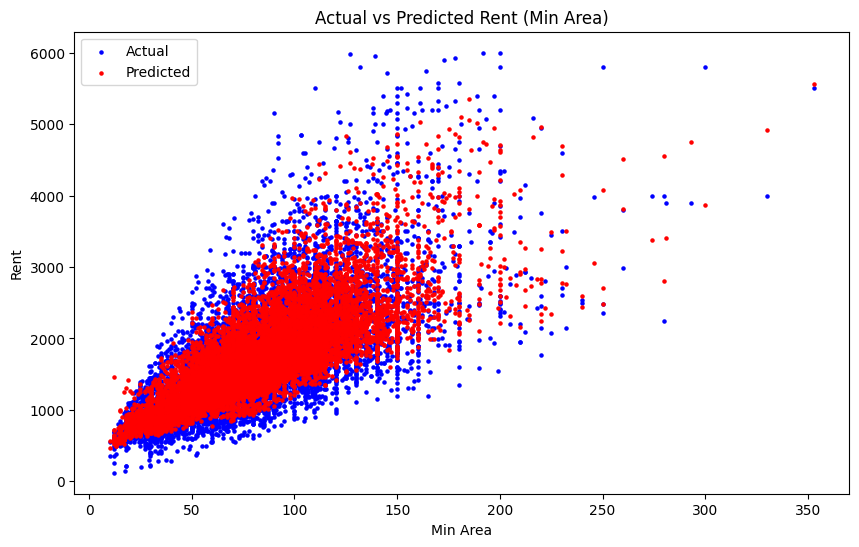

In [104]:
# Copy data
data_prepared = data.copy()

# Define features (X) and target (y)
X = data_prepared.drop(columns=['rent_full'])
y = data_prepared['rent_full']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize LGBM model with a set of hyperparameters
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=0, verbose=0)

# Cross-validation to evaluate model performance
cv_mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean CV MSE: {np.mean(cv_mse_scores)}')
print(f'Standard Deviation CV MSE: {np.std(cv_mse_scores)}')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
model_rmse = np.sqrt(mean_squared_error(y_test, predictions))
model_r2 = r2_score(y_test, predictions)
print(f'Root Mean Squared Error: {model_rmse}')
print(f'R^2 Score: {model_r2}')

# Calculate the average of rent_full over the predicted values for train_data
average_predicted_rent_train = np.mean(y_pred)
print(f'Average Predicted Rent (Test Data): {average_predicted_rent_train}')

# Predict rent_full on the test_data DataFrame
y_test_data_pred = model.predict(test_data)

# Calculate the average of rent_full over the predicted values for test_data
average_predicted_rent_test = np.mean(y_test_data_pred)
print(f'Average Predicted Rent (Test Data DataFrame): {average_predicted_rent_test}')

# Plot true values vs. predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, label='True vs. Predicted', s=5)
plt.plot(y_test, y_test, color='red', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Accuracy')
plt.legend()
plt.show()

# Plotting actual vs predicted values for a specific feature (e.g., 'min_area')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)
plt.scatter(X_test['min_area'], predictions, color='red', label='Predicted', s=5)
plt.title('Actual vs Predicted Rent (Min Area)')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


In [93]:
train_data.head()

balcony  basement  bath  cabletv  cheminee  dishwasher  dryer  elevator  \
0      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
1      0.0       0.0   1.0      1.0       0.0         0.0    0.0       0.0   
2      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
3      1.0       0.0   1.0      1.0       0.0         0.0    0.0       1.0   
4      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   

   floors  furnished  gardenshed  heating_air  heating_earth  heating_electro  \
0     1.0        0.0         0.0            0              0              0.0   
1     5.0        0.0         0.0            0              0              0.0   
2     1.0        0.0         0.0            0              0              0.0   
3     3.0        0.0         0.0            0              0              0.0   
4     1.0        0.0         0.0            0              0              0.0   

   heating_far  heating_gas  heating_oil  heating_pellets  kids_friendly  \
0            0          0.0          0.0                0            0.0   
1            0          0.0          0.0                0            0.0   
2            0          0.0          0.0                0            0.0   
3            0          0.0          0.0                0            1.0   
4            0          0.0          0.0                0            0.0   

        lat  laundry       lon  middle_house  msregion  newly_built  \
0 -1.029668      0.0 -1.588964             0        90            0   
1 -2.174832      0.0 -0.033064             0        96            0   
2 -2.393261      0.0  1.101866             0        82            0   
3  1.402705      0.0  0.722392             0        50            0   
4 -1.794203      0.0 -1.950986             0        86            0   

   oldbuilding  oven  parking_indoor  parking_outside  playground  pool  \
0          0.0     0             0.0              0.0         0.0     0   
1          0.0     0             0.0              0.0         0.0     0   
2          0.0     0             0.0              0.0         0.0     0   
3          0.0     0             1.0              0.0         0.0     0   
4          0.0     0             0.0              0.0         0.0     0   

   quiet  raised_groundfloor  rent_full  rooms  shower  size_land  sunny  \
0      0                 0.0       1600    3.5       0        0.0      0   
1      0                 0.0        600    2.0       0        0.0      0   
2      0                 0.0       2600    3.5       0        0.0      0   
3      0                 0.0       1915    3.5       0        0.0      0   
4      0                 0.0       5600    6.0       0        0.0      0   

   terrace  toilets  topstorage  veranda  water   year_built  Micro_rating  \
0      0.0      1.0         0.0      0.0    0.0  1993.937500         2.210   
1      0.0      1.0         0.0      0.0    0.0  2000.424242         5.050   
2      0.0      1.0         0.0      0.0    0.0  1993.918919         6.150   
3      0.0      1.0         0.0      0.0    0.0  2011.000000         5.695   
4      0.0      1.0         0.0      0.0    0.0  1996.962963         5.765   

   Micro_rating_NoiseAndEmission  Micro_rating_Accessibility  \
0                       6.333333                    2.357143   
1                       5.666667                    7.071429   
2                       4.722222                    6.553571   
3                       4.666667                    7.107143   
4                       4.444444                    8.321429   

   Micro_rating_DistrictAndArea  Micro_rating_SunAndView  \
0                      0.432432                        1   
1                      4.648649                        8   
2                      4.918919                        8   
3                      5.500000                        6   
4                      3.094595                        9   

   Micro_rating_ServicesAndNature  wgh_a

## XGBoost

Root Mean Cross-Validated MSE: 246.60514908495264
Root Mean Squared Error Model: 245.17687391927873
Average Predicted Rent (Train Data): 1683.1947021484375
Average Predicted Rent Test (Test Data): 1663.3992919921875


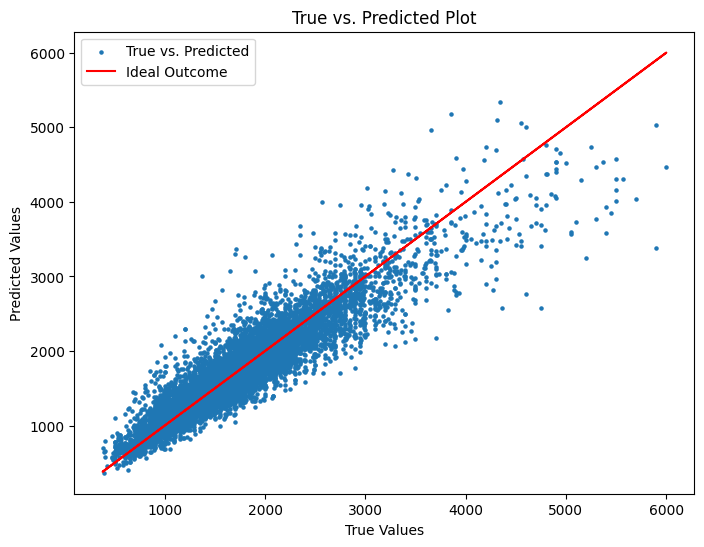

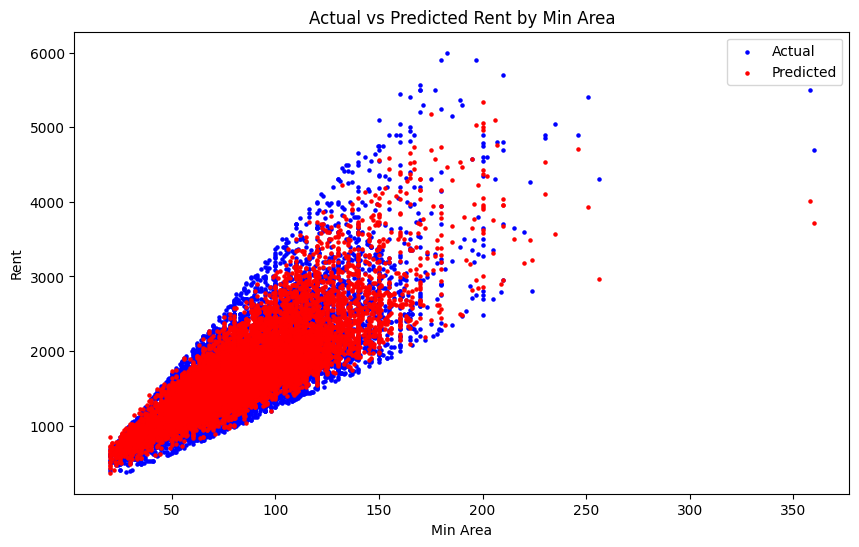

<Figure size 1000x800 with 0 Axes>

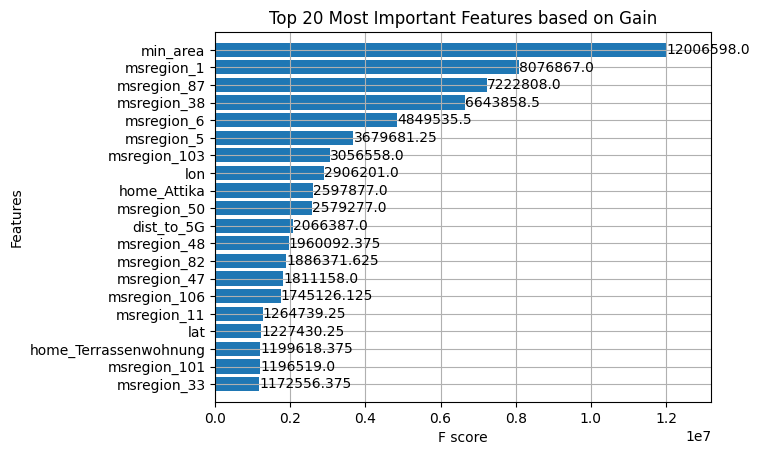

In [81]:
data_copy = train_data.copy()

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the XGBoost model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=700,
    learning_rate=0.1,
    max_depth=7,
    random_state=0
)

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert scores to positive
print(f'Root Mean Cross-Validated MSE: {np.sqrt(np.mean(mse_scores))}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error Model: {rmse}')


# Calculate the average of rent_full over the predicted values for train_data
average_predicted_rent_train = np.mean(y_pred)
print(f'Average Predicted Rent (Train Data): {average_predicted_rent_train}')

# Predict rent_full on the test_data DataFrame
y_test_data_pred = model.predict(test_data)

# Calculate the average of rent_full over the predicted values for test_data
average_predicted_rent_test = np.mean(y_test_data_pred)
print(f'Average Predicted Rent Test (Test Data): {average_predicted_rent_test}')

# Plotting the predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for min_area
plt.figure(figsize=(10, 6))
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, importance_type='gain', height=0.8)
plt.title('Top 20 Most Important Features based on Gain')
plt.show()


### Saving the predictions

In [82]:
# Create the predictions DataFrame
predictions_df = pd.DataFrame({'rent': y_test_data_pred})

# Reset the index to ensure it starts from 0
predictions_df.reset_index(drop=True, inplace=True)

# Add 72000 to the index to create the 'key' column
predictions_df['key'] = predictions_df.index + 72000

# Rearrange the columns
columns_reordered = ['key', 'rent']

# Reindex the DataFrame with the new column order
predictions_df = predictions_df[columns_reordered]

# Export as .csv
predictions_df.to_csv('data/Y_test_FloMo.csv', index=False)


### Saving the model

In [10]:
# Save the model to a file
filename = 'models/xgb_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


## With Grid Search

### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.284699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6307
[LightGBM] [Info] Number of data points in the train set: 43765, number of used features: 66
[LightGBM] [Info] Start training from score 1692.151742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.136765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6300
[LightGBM] [Info] Number of data points in the train set: 43765, number of used features: 66
[LightGBM] [Info] Start training from score 1687.801485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.088077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

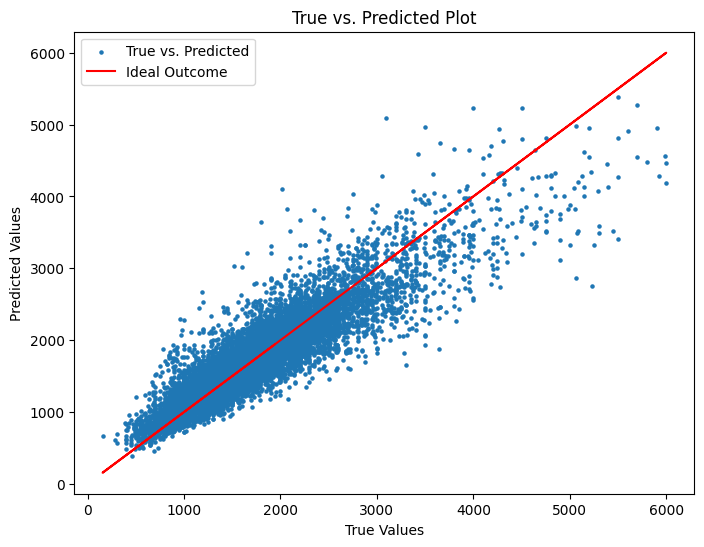

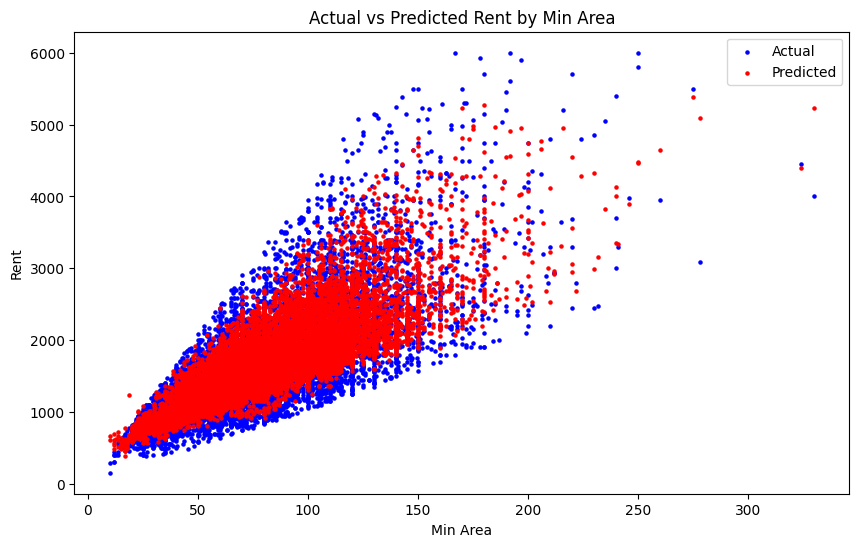

In [155]:
# Drop some columns
# drop_list = ['lat', 'lon', 'area_group', 'key', 'avg_bauperiode', 'price_m2']
drop_list = []
data_copy = data.copy()
data_copy.drop(columns=drop_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1],
    'max_depth': [-1]
}

# Initialize the LGBM model
model = LGBMRegressor(random_state=0)

# Create a GridSearchCV object with the model, parameter grid, and cross-validation settings
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Cross-validate the best model
mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert scores to positive

# Print mean and standard deviation of cross-validated MSE scores for the best model
print(f'Mean Cross-Validated MSE (Best Model): {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE (Best Model): {np.std(mse_scores)}')

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict the target for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (Best Model): {rmse}')
print(f'R^2 Score (Best Model): {r2}')

# Plotting the predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for min_area
plt.figure(figsize=(10, 6))
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Random Forest

In [60]:
data_copy = train_data.copy()

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print("Feature Importance:", model.feature_importances_)

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


# Horizontal bar plot of feature importance

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X_train.columns[sorted_idx]

plt.figure(figsize=(15, 9))
plt.barh(features, feature_importance[sorted_idx], height=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


KeyboardInterrupt: 

## Support Vector Machine

In [30]:
#Drop some more features

drop_micros_list = ['area_group', 'key', 'avg_bauperiode', 'price_m2']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize SVR without parameter optimization
svr = SVR()

# Cross-validate the SVR model
mse_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
svr.fit(X_train, y_train)

# Predict the target for the test set
y_pred = svr.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Neural Network

Mean Cross-Validated MSE: 116106.74236679202
Standard Deviation of Cross-Validated MSE: 3090.760664545983
Root Mean Squared Error: 334.92397125585313
R^2 Score: 0.7354584164552144


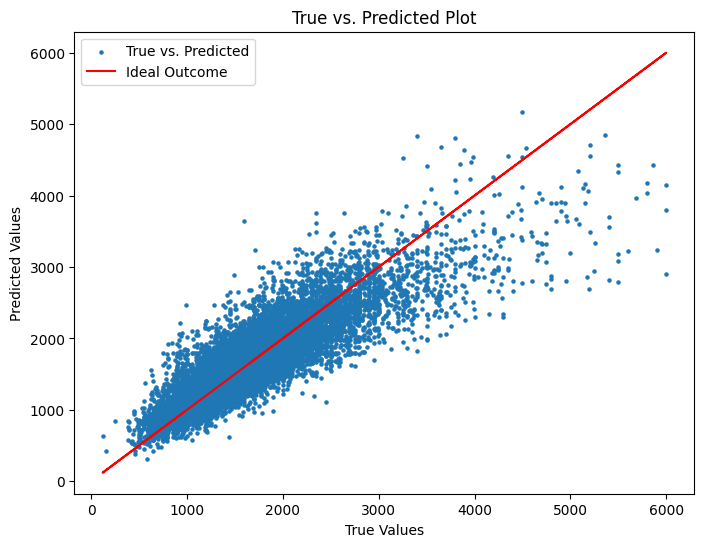

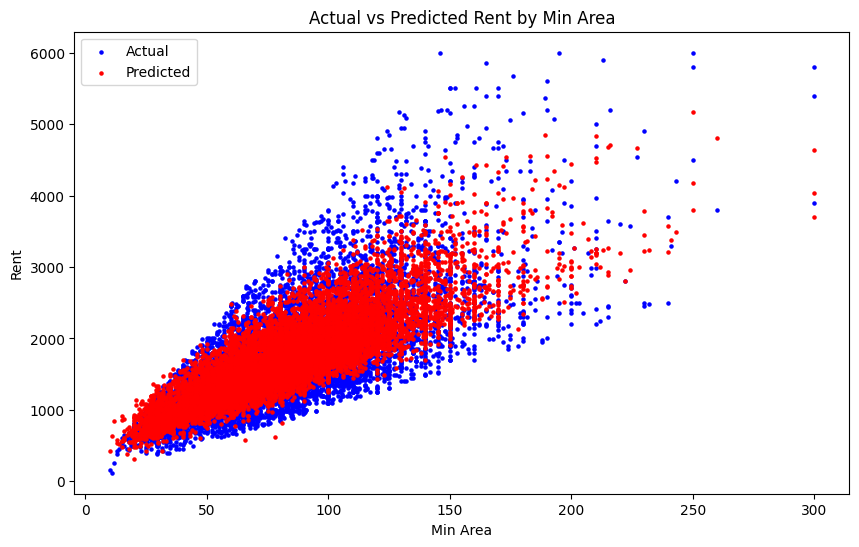

In [125]:

data_copy = train_data.copy()


# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize MLPRegressor without hyperparameter tuning
mlp = MLPRegressor(max_iter=2000)

# Cross-validate the MLPRegressor model
mse_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
mlp.fit(X_train, y_train)

# Predict the target for the test set
y_pred = mlp.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Additional Graphs

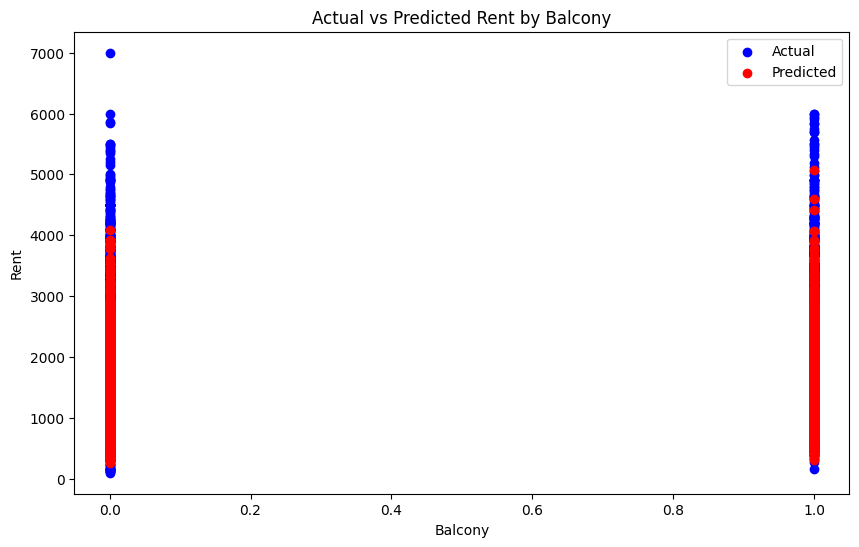

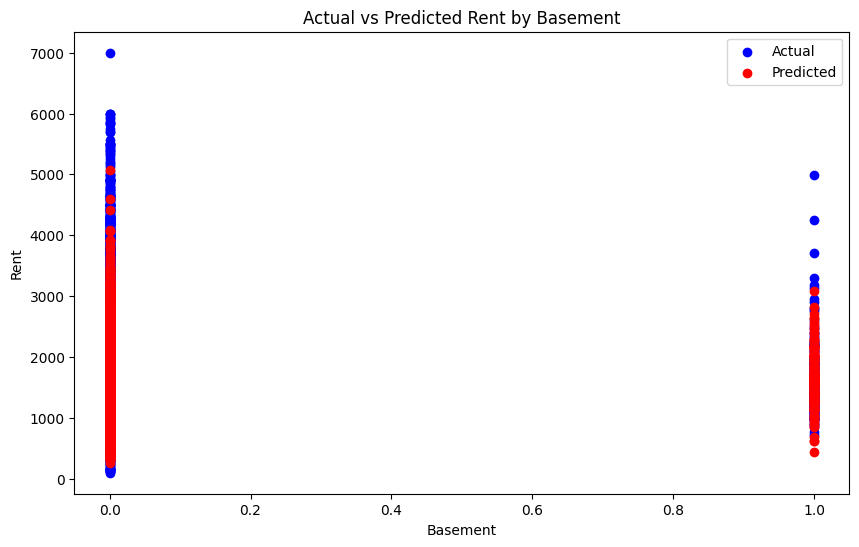

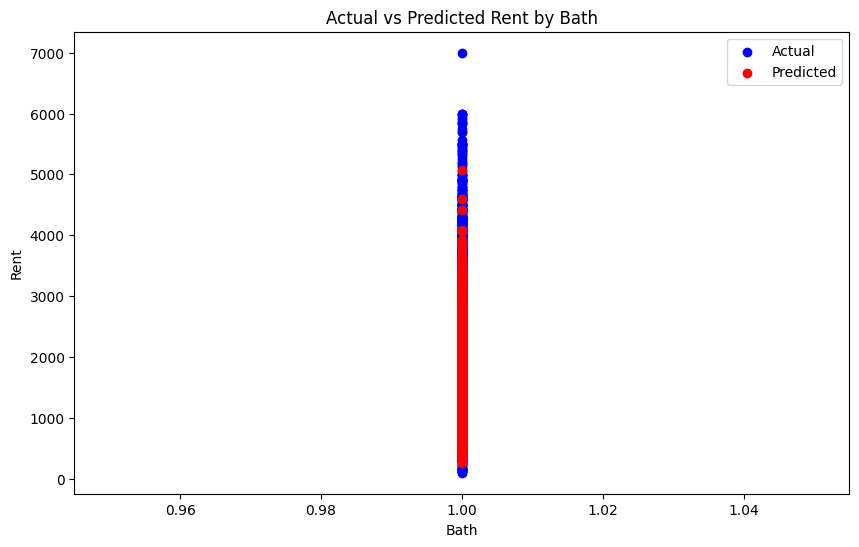

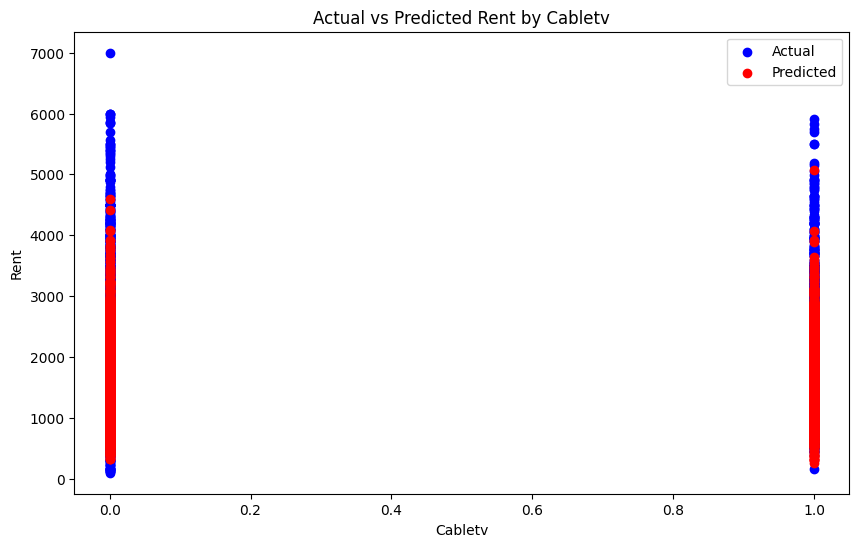

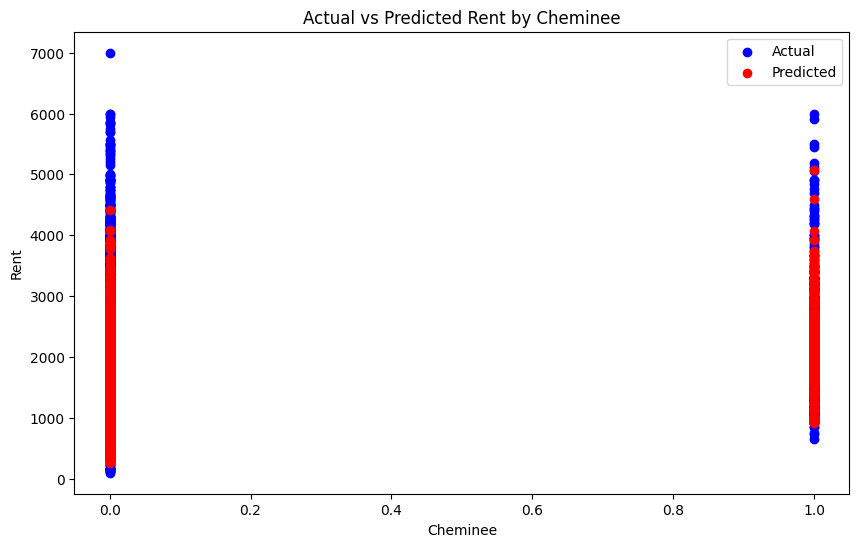

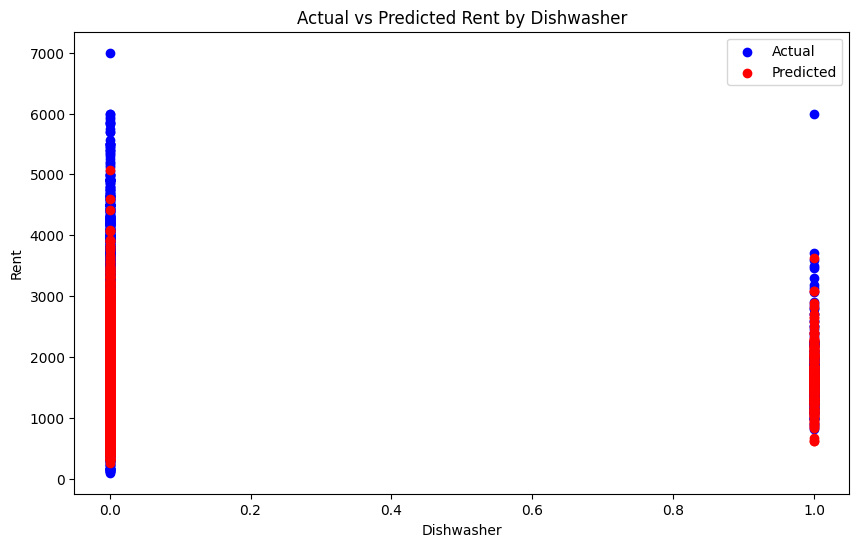

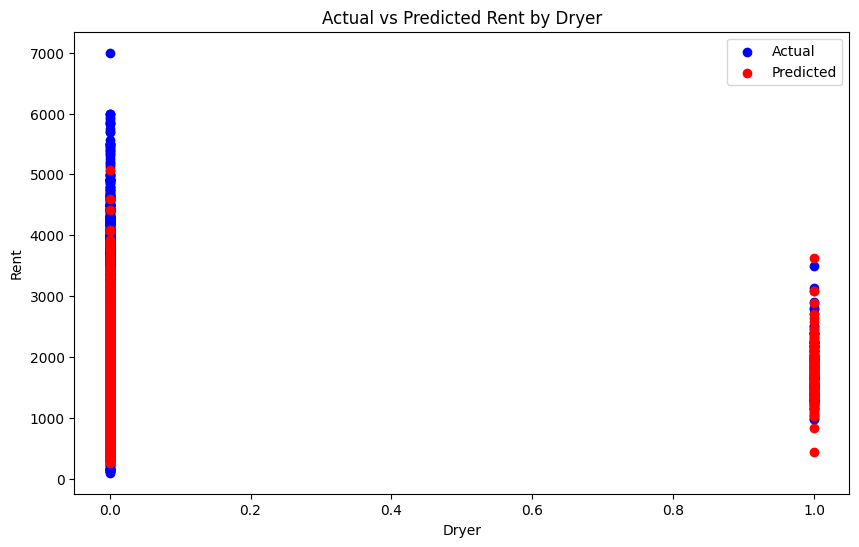

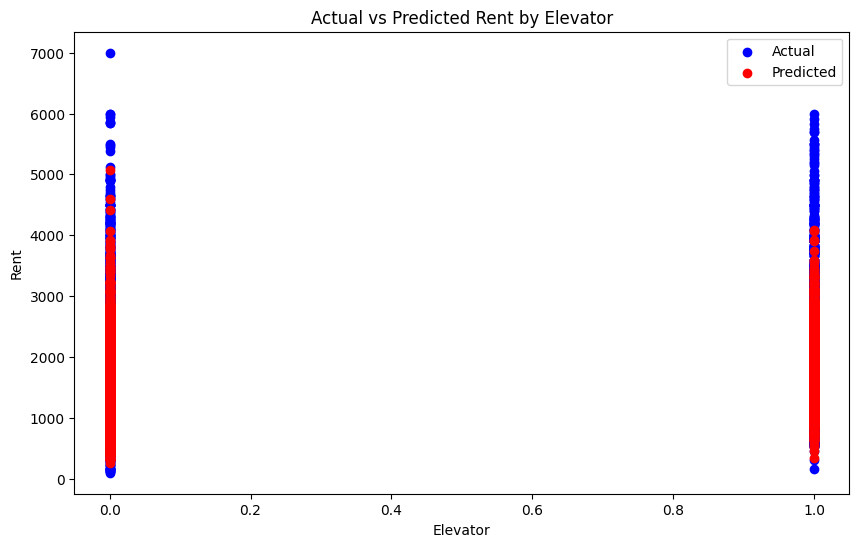

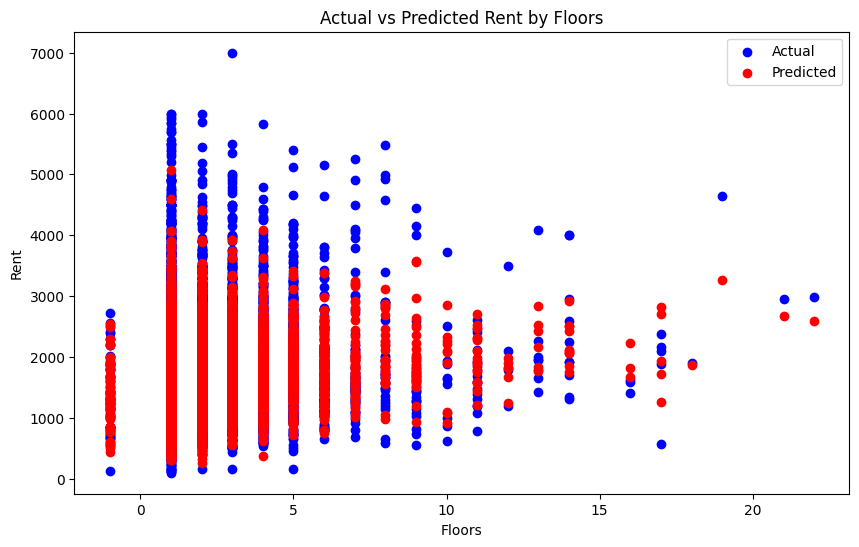

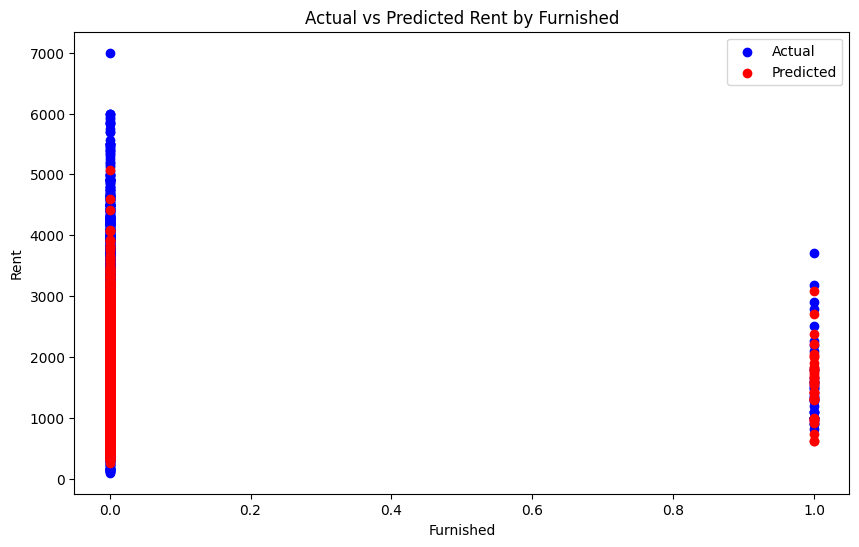

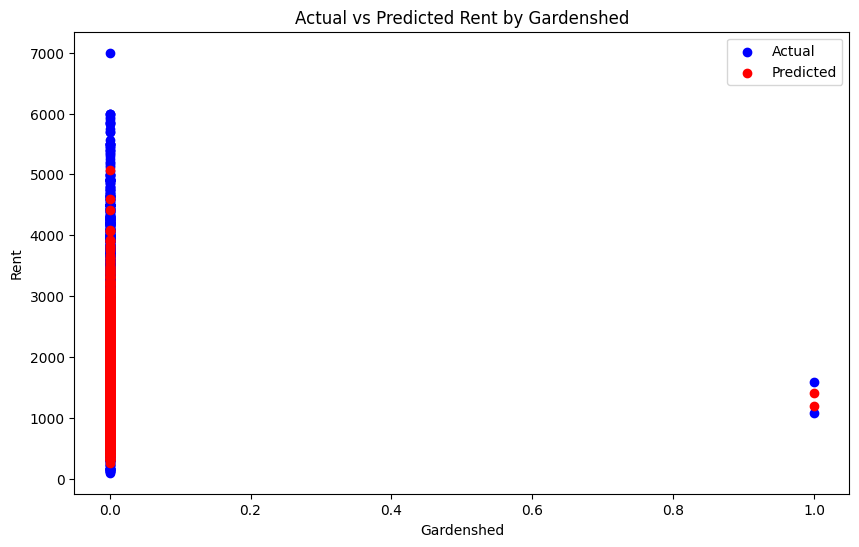

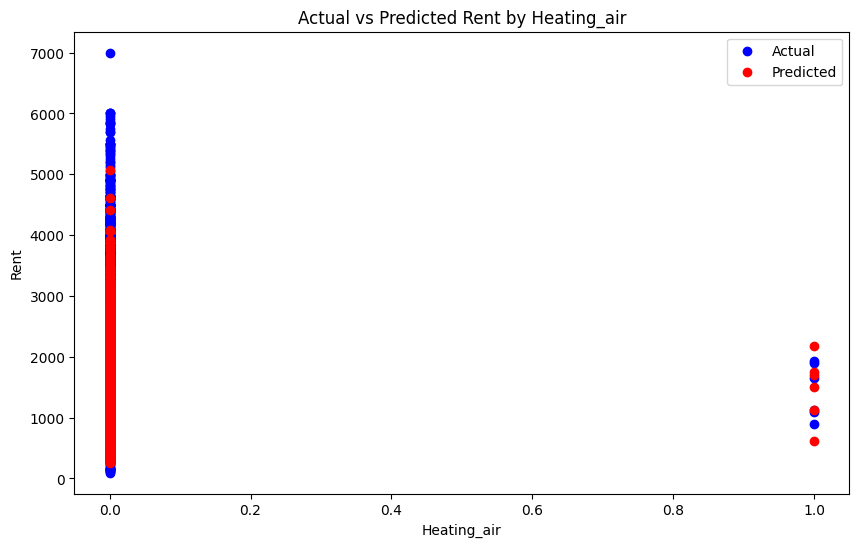

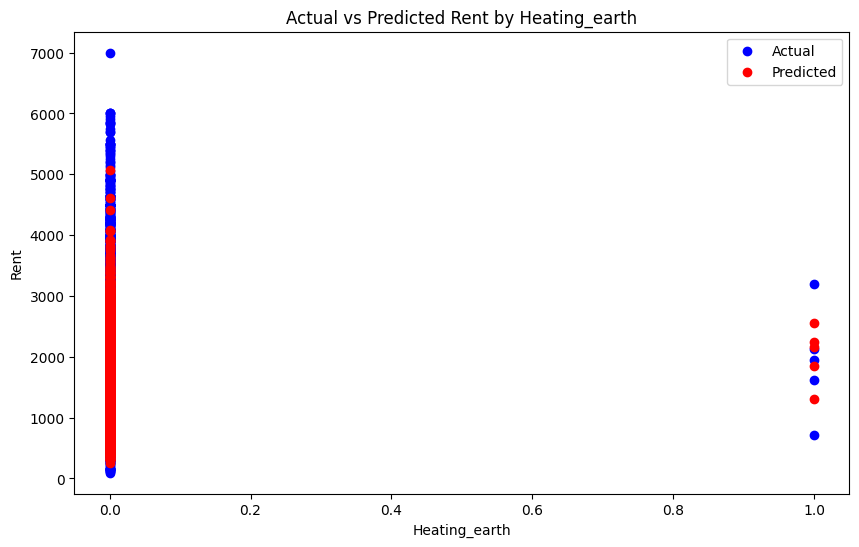

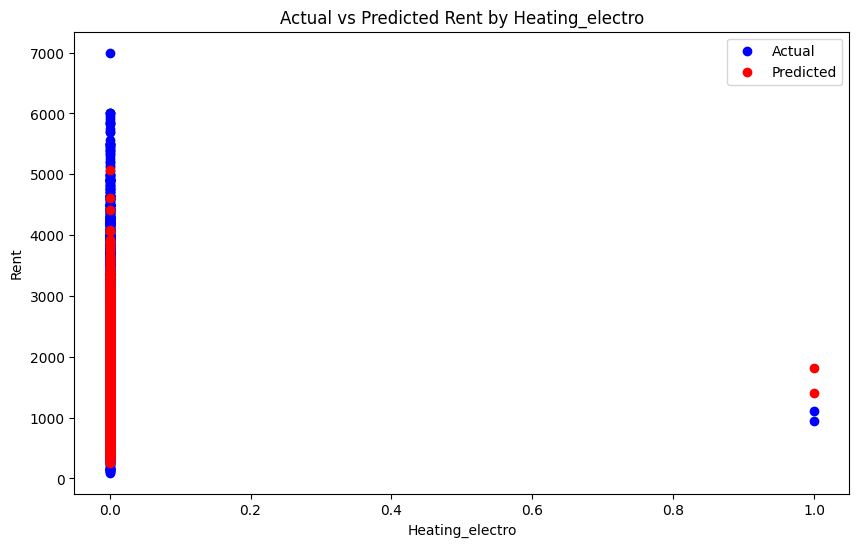

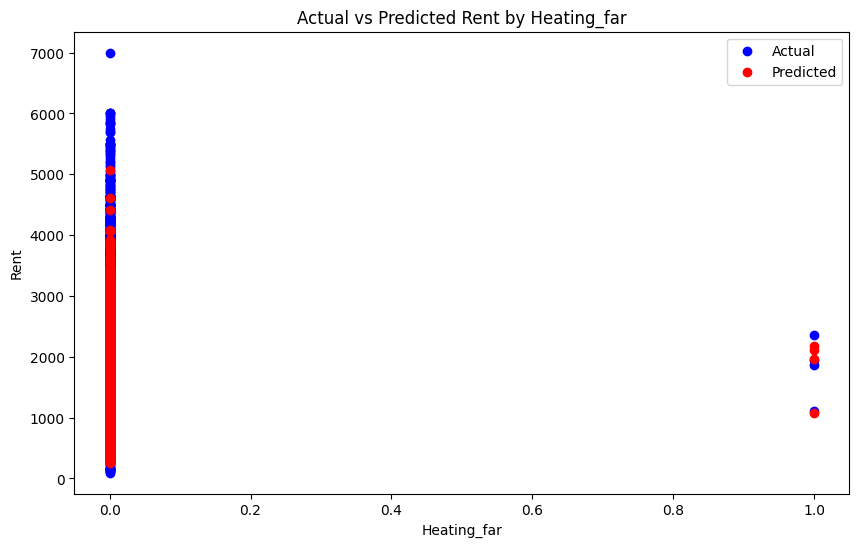

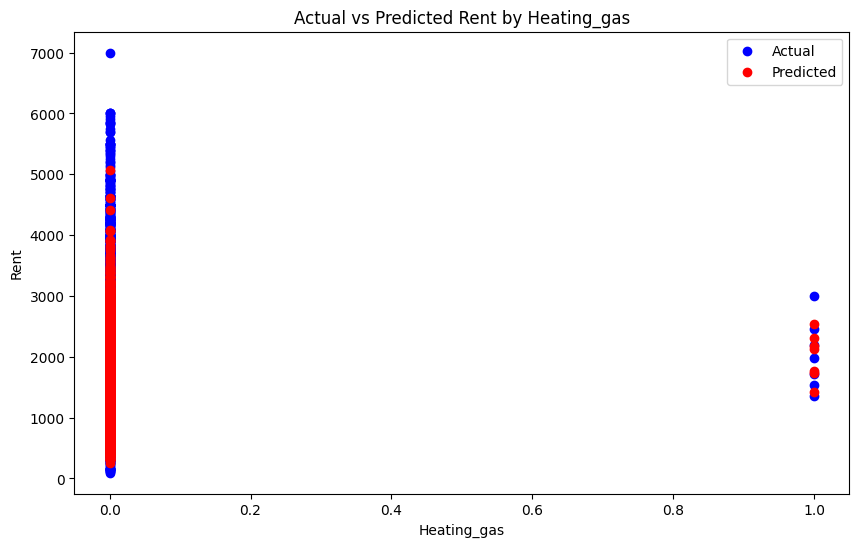

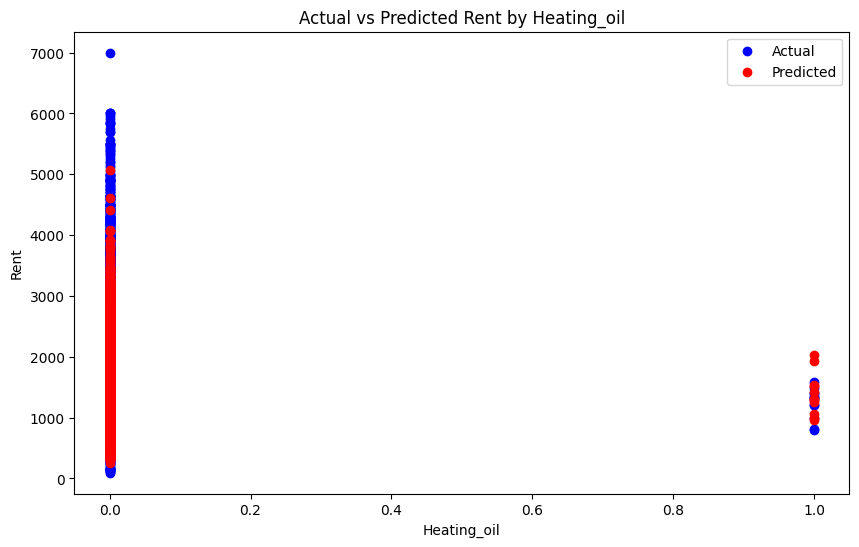

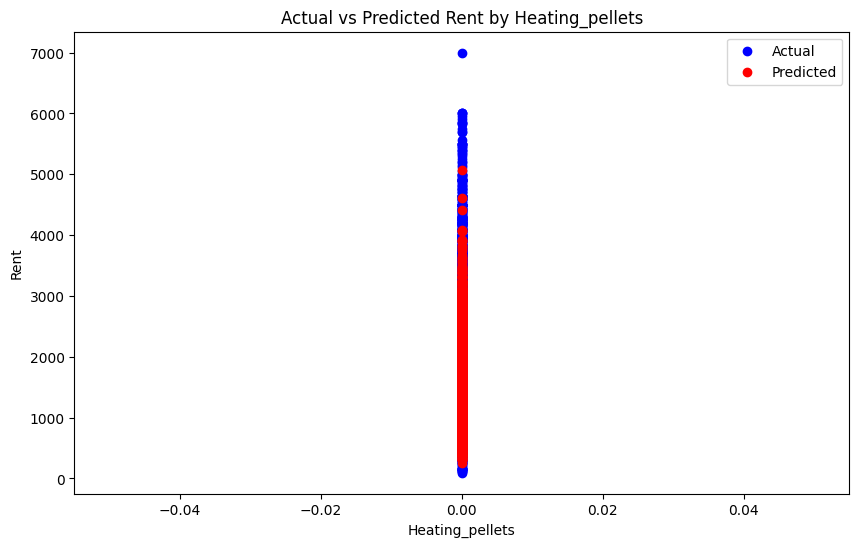

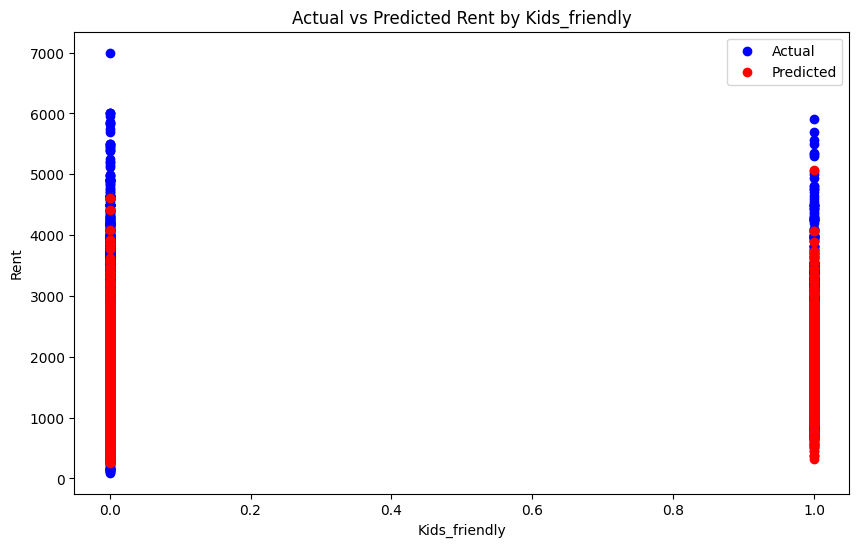

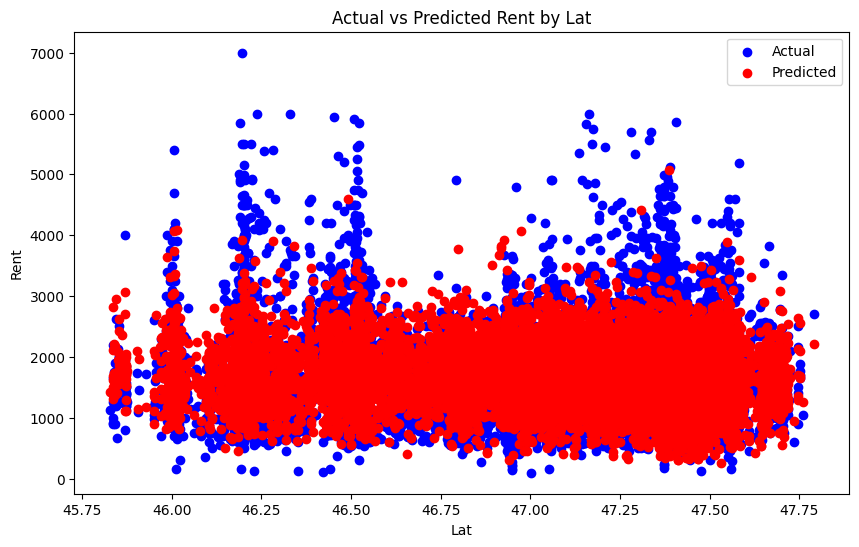

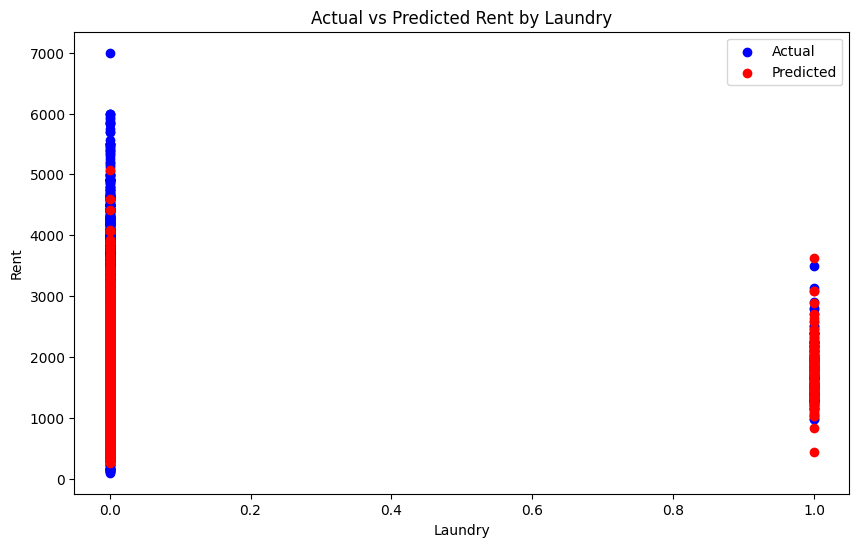

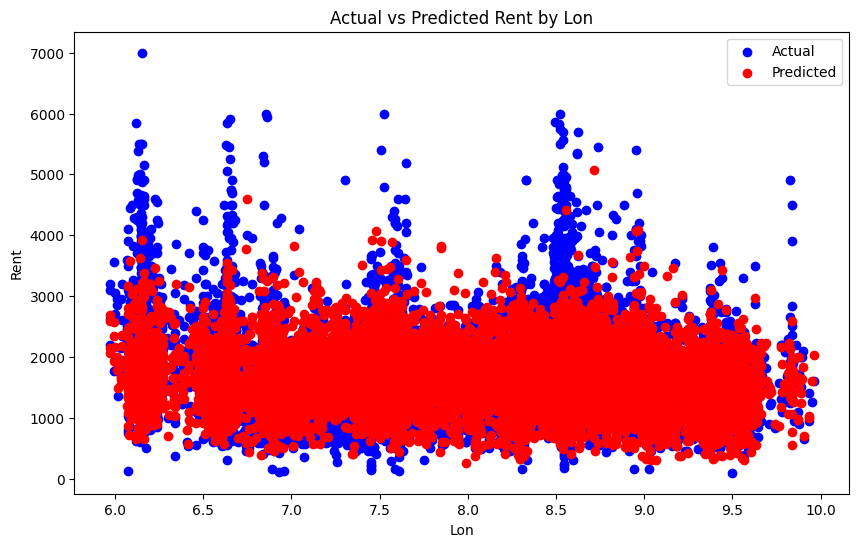

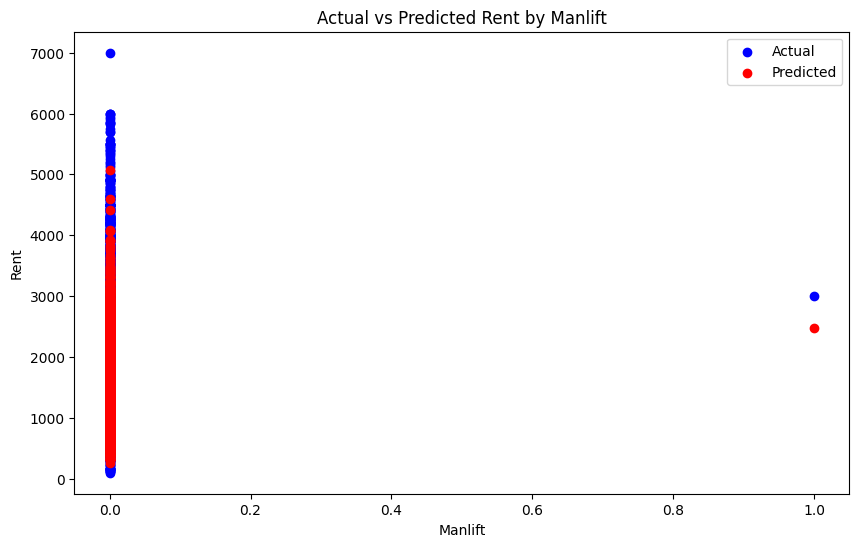

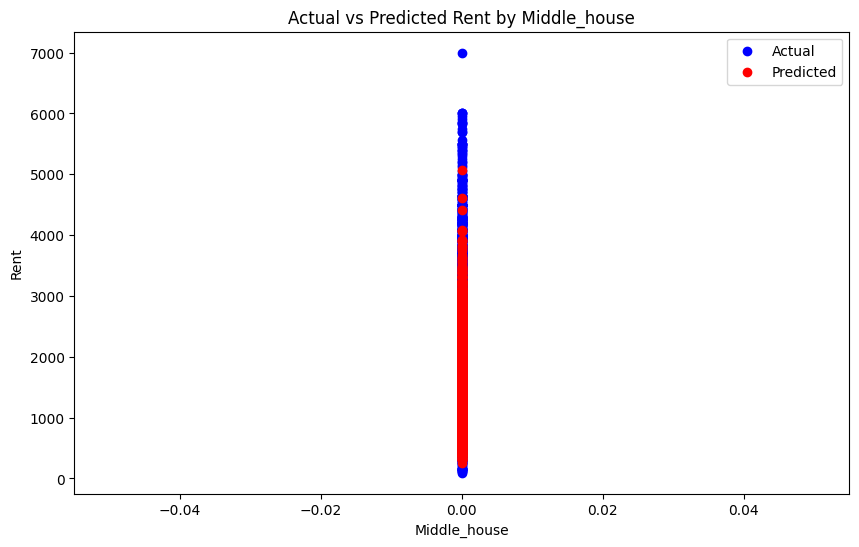

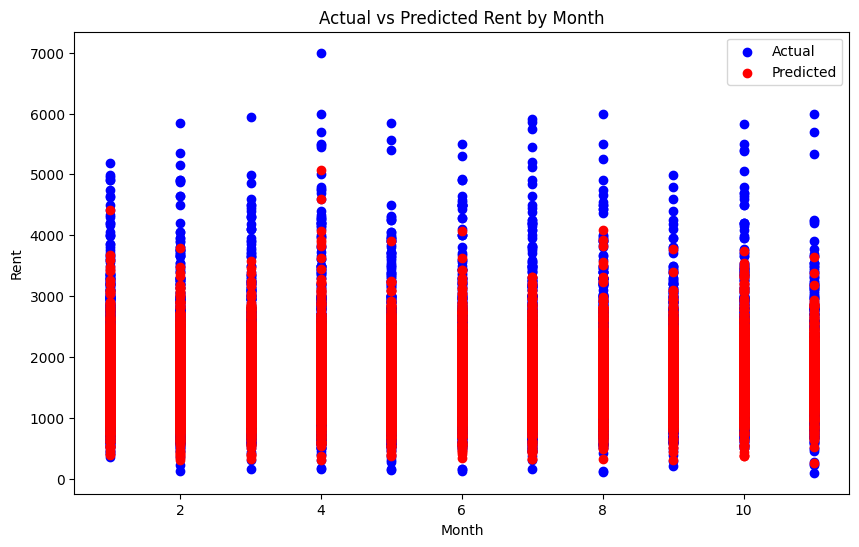

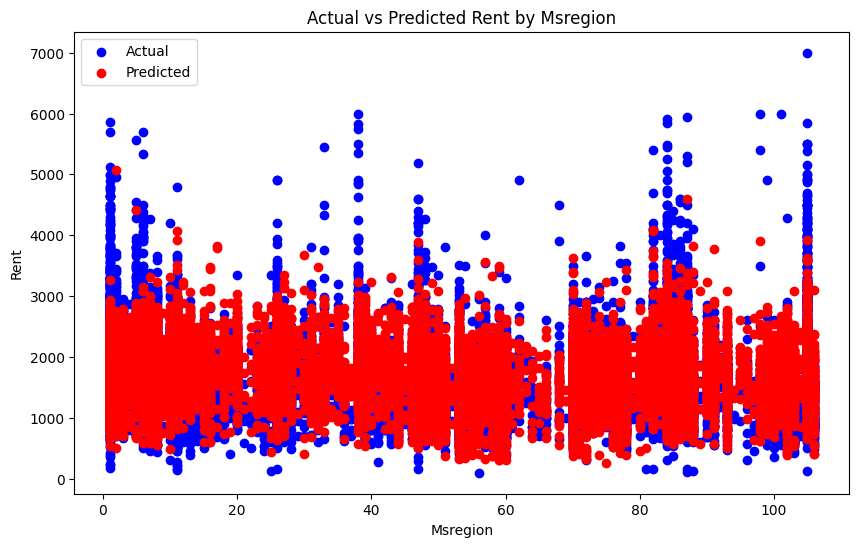

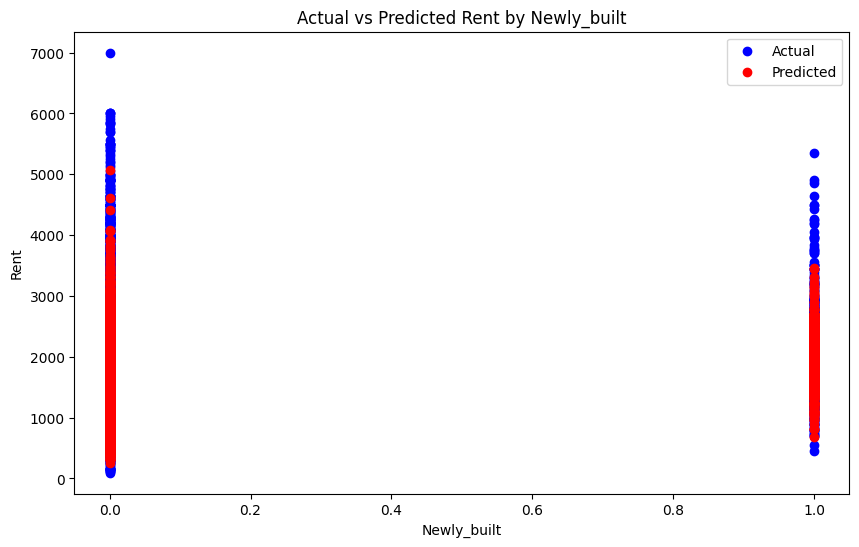

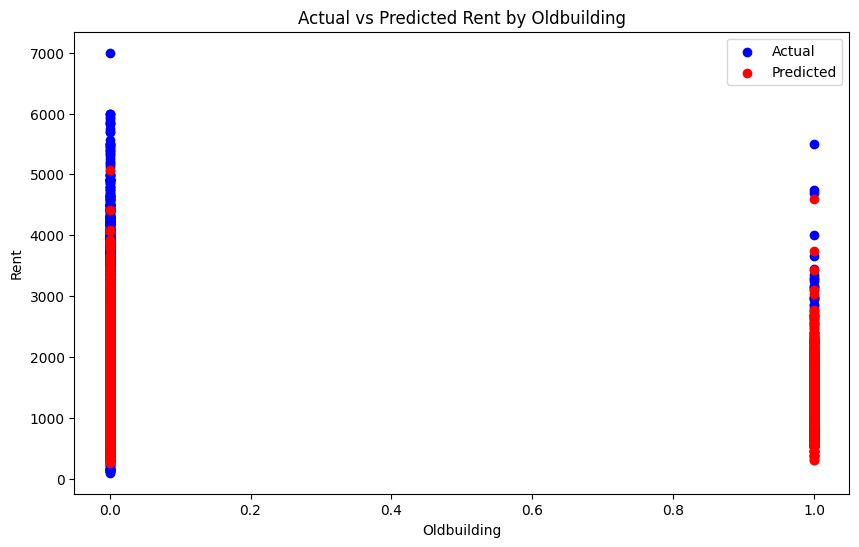

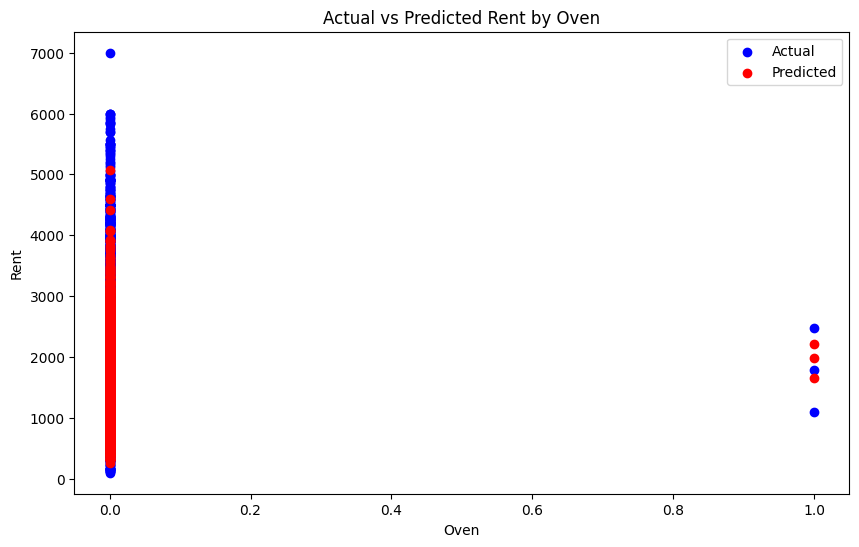

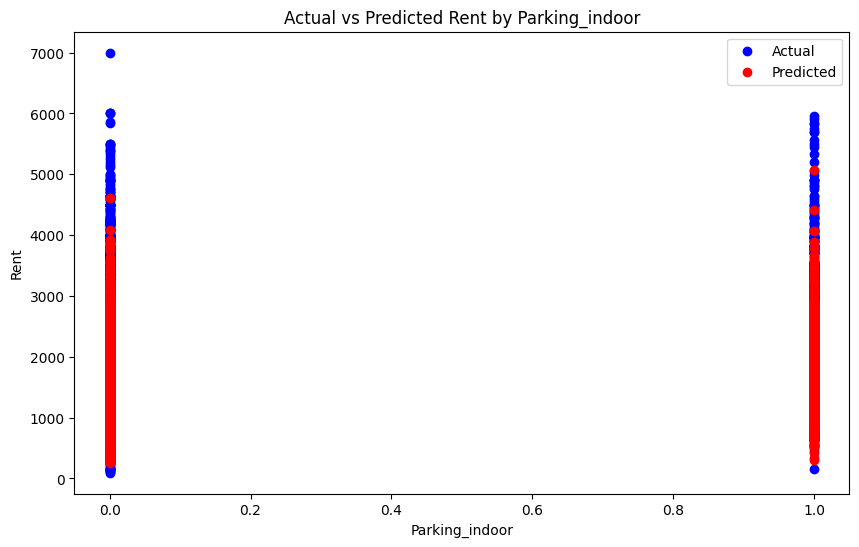

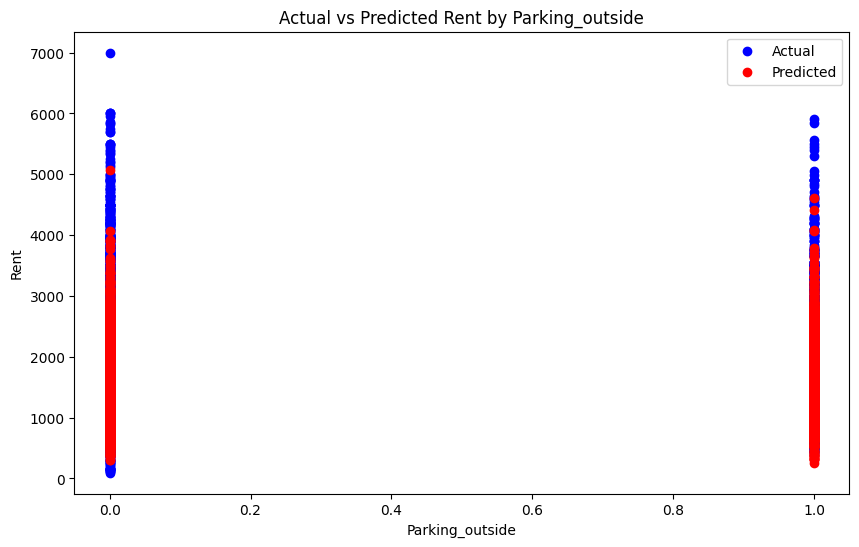

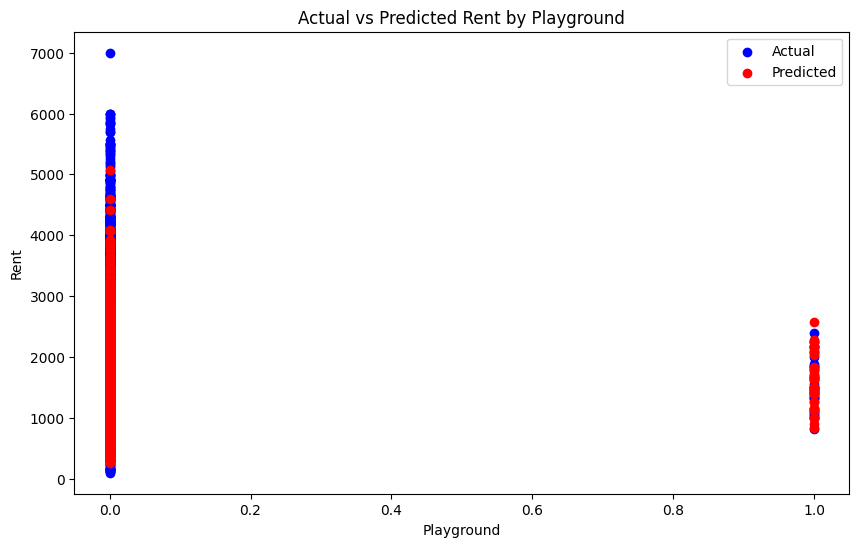

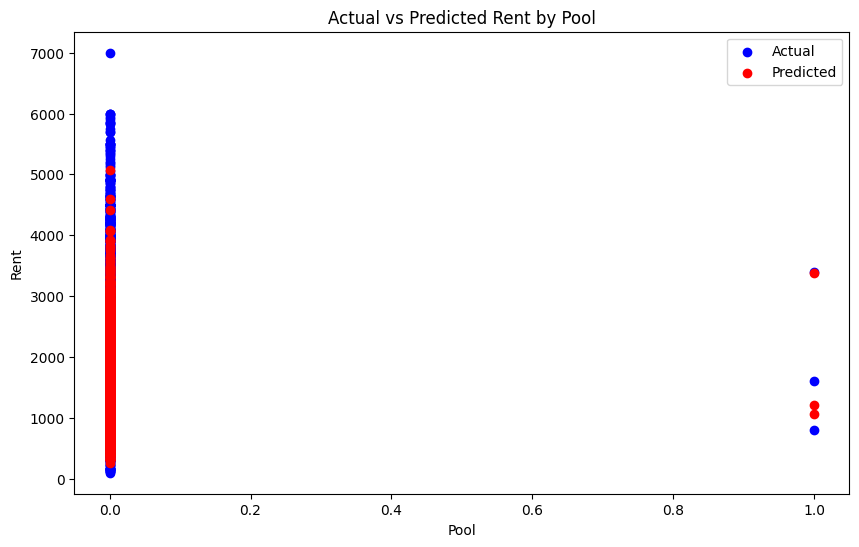

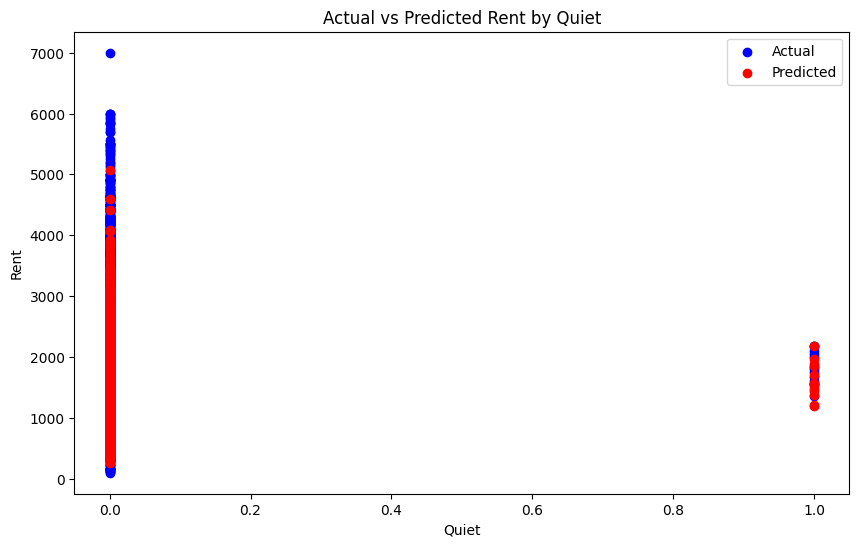

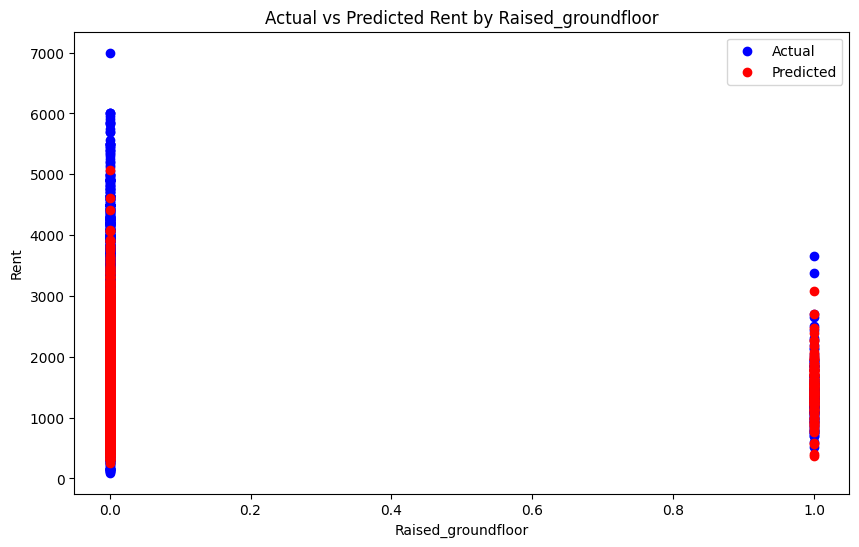

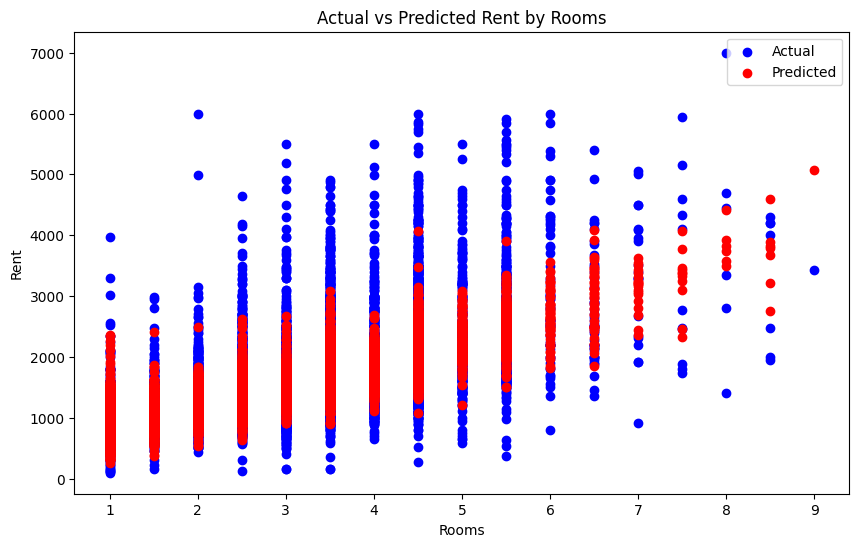

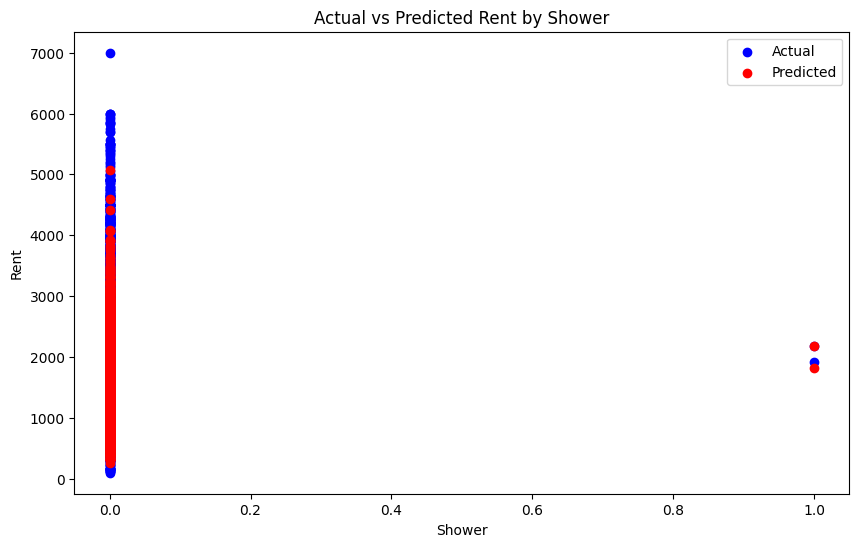

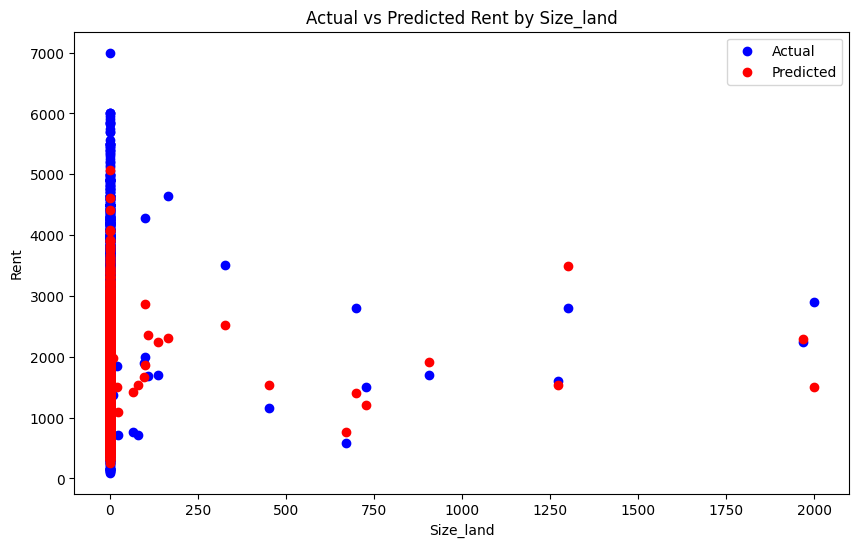

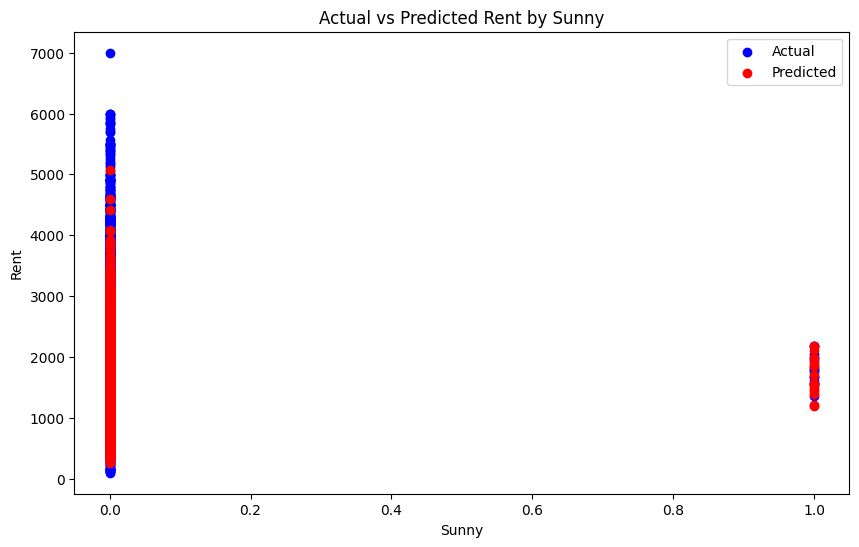

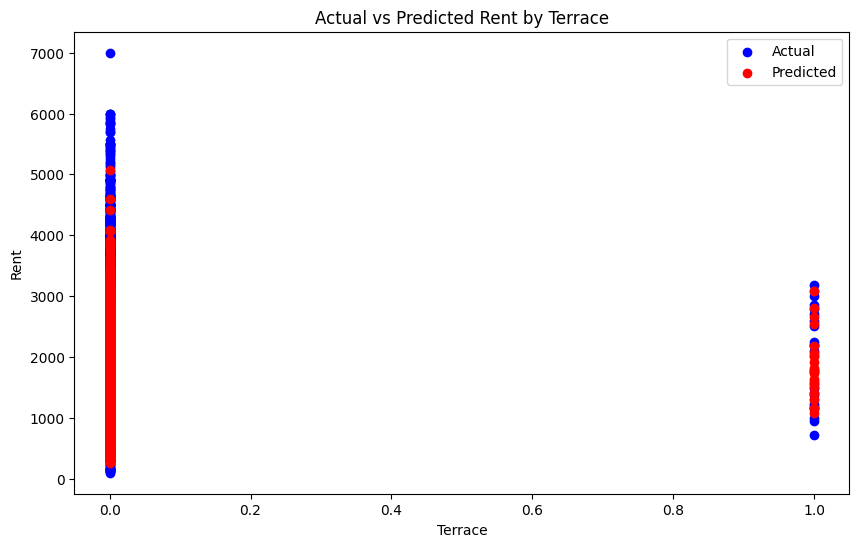

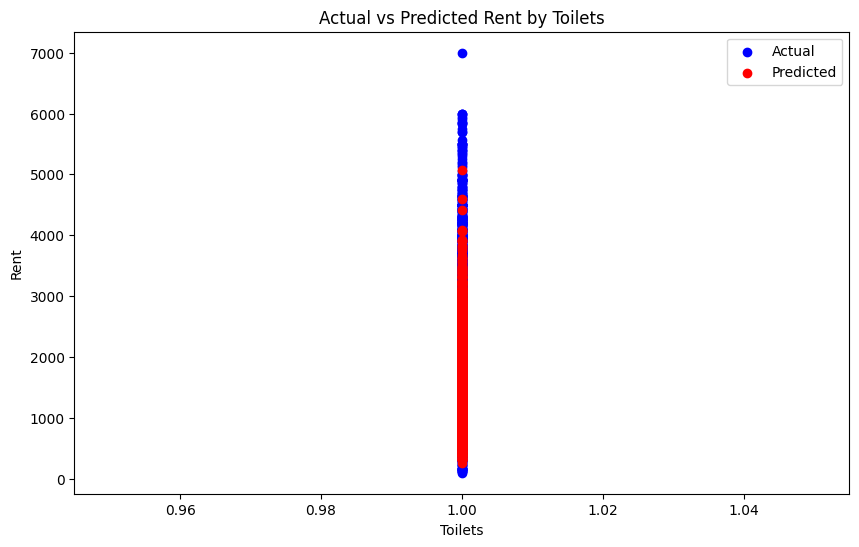

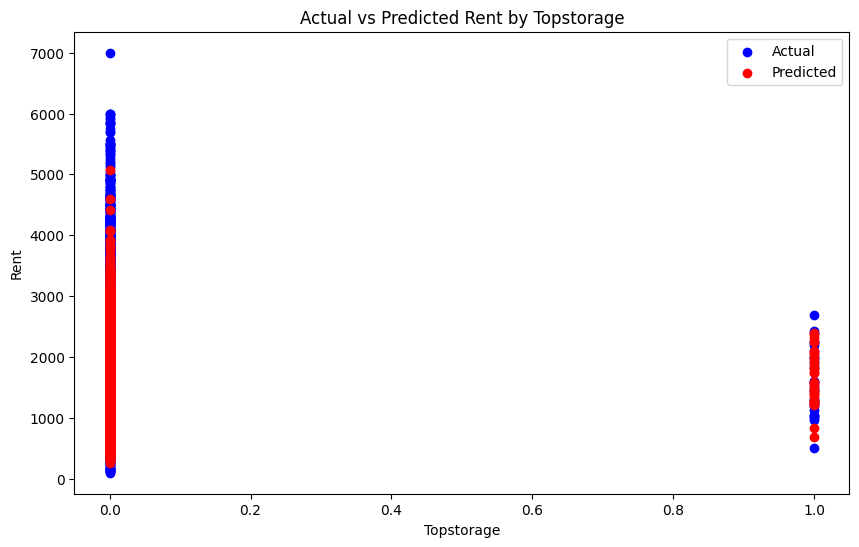

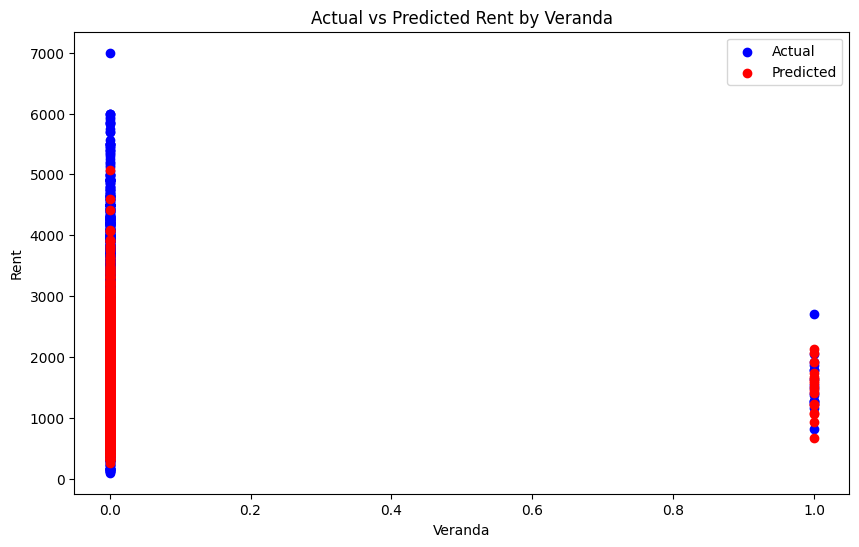

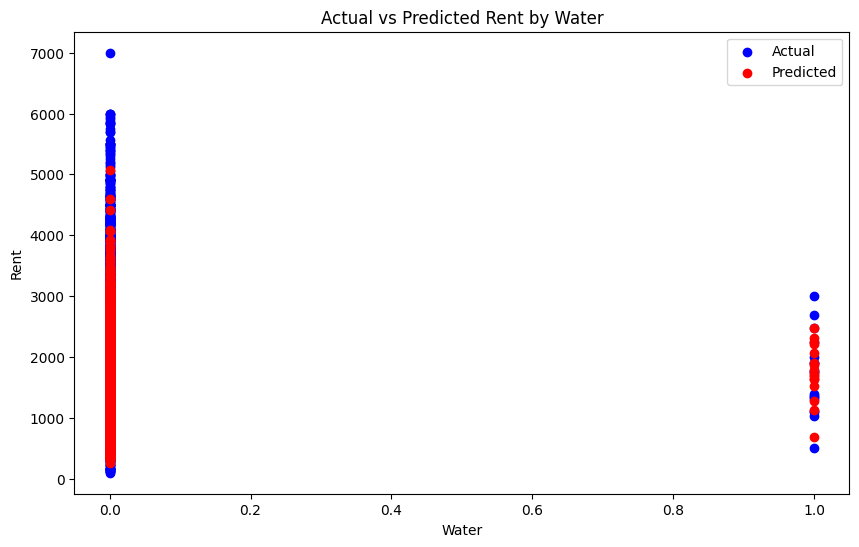

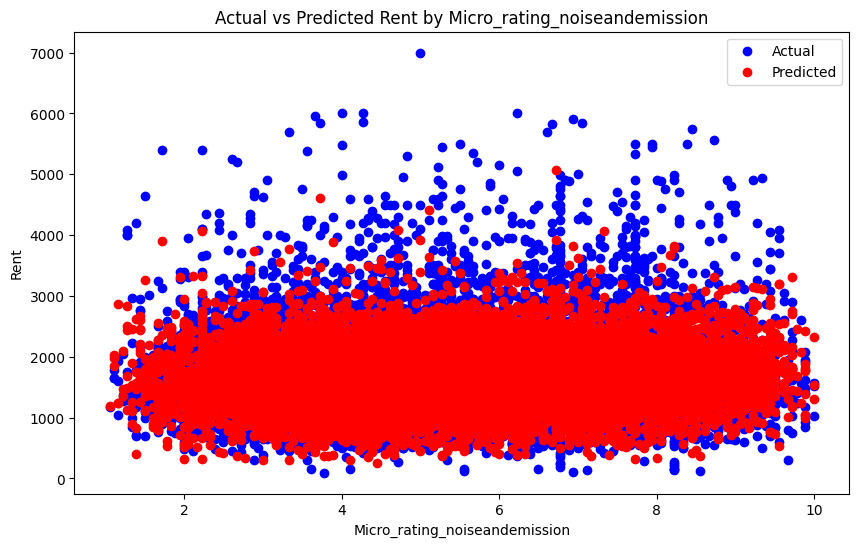

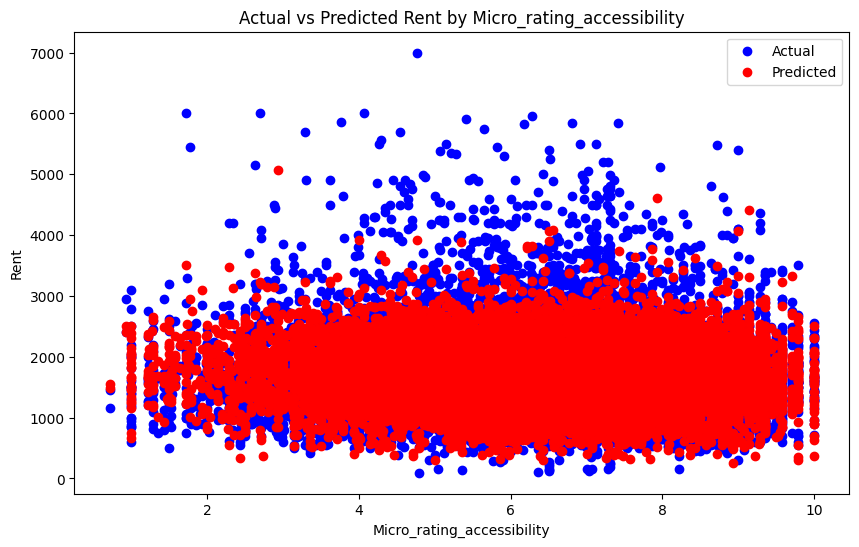

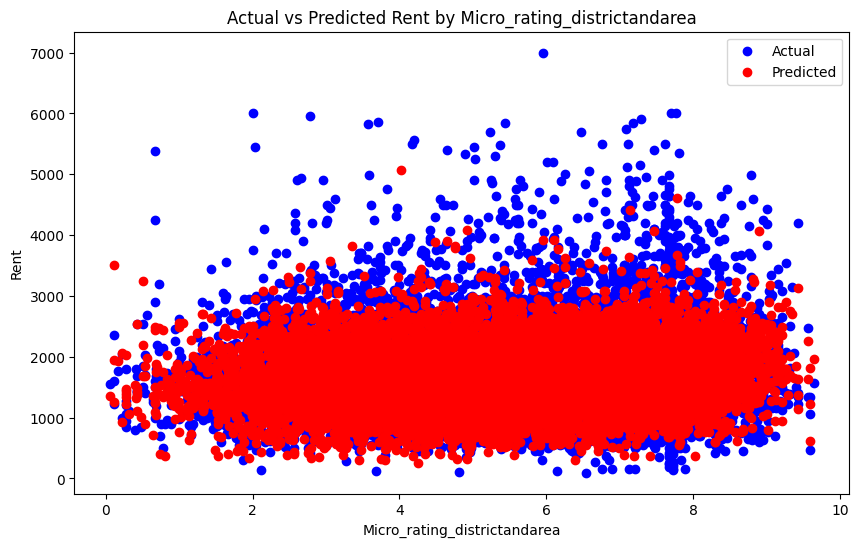

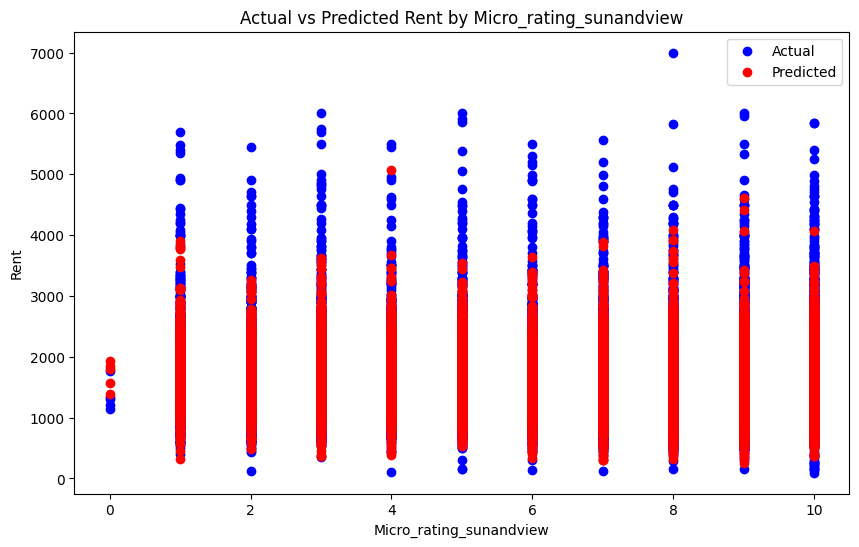

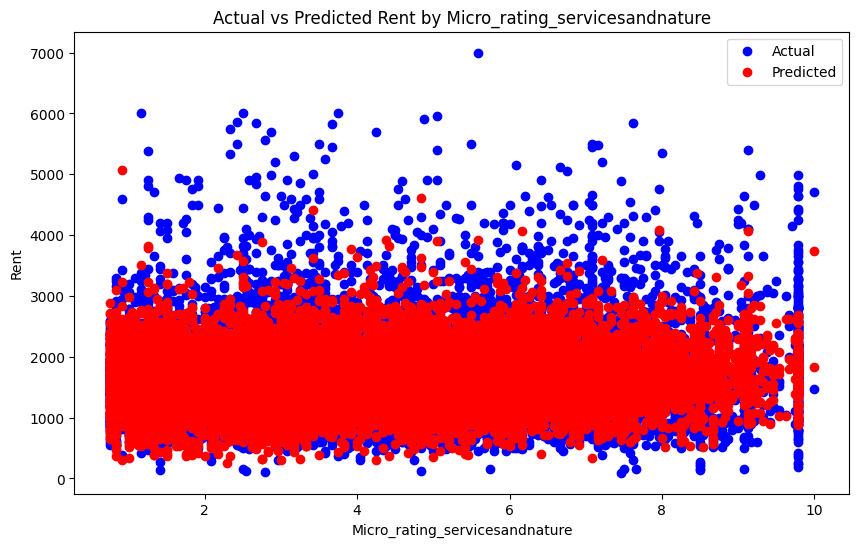

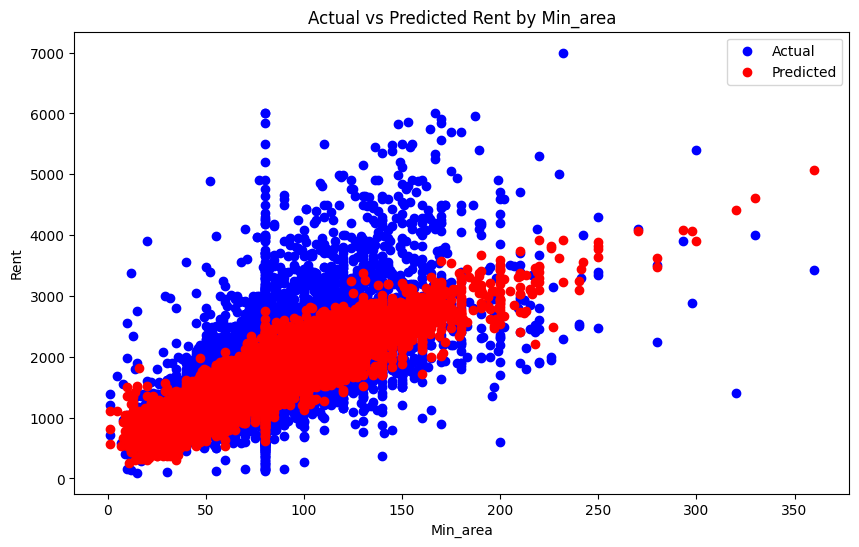

In [113]:
# Here we plot every column against the actual and predicted rent

# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]


for param in params_list:

    plt.figure(figsize=(10, 6))

    plt.scatter(X_test[param], y_test, color='blue', label='Actual')

    plt.scatter(X_test[param], y_pred, color='red', label='Predicted')

    plt.title(f'Actual vs Predicted Rent by {param.capitalize()}')

    plt.xlabel(param.capitalize())

    plt.ylabel('Rent')

    plt.legend()

    plt.show()


## Presentation 

In [83]:
#file_path = 'data/Y_test_FloMo.csv'
train_data = pd.read_csv('data/prep_train_2std.csv')

# Test Data


file_path = 'data/Y_test_FloMo.csv'

pred = pd.read_csv(file_path)


In [84]:
# create new column for m2_prize 
data = pd.merge(test_data, pred, left_index=True, right_index=True)


data.shape

(18001, 180)

In [85]:
#create price_m2 
data['price_m2'] = data['rent'] / data['min_area']

In [86]:
print(pd.DataFrame(data['rent'].describe()))

               rent
count  18001.000000
mean    1663.399249
std      595.897297
min      356.385300
25%     1279.766100
50%     1580.352200
75%     1950.353100
max     5909.399400


In [87]:
y_train_summary = y_train.describe()
data_rent_summary = pd.DataFrame(data['rent'].describe())

# Concatenate the two summaries
combined_summary = pd.concat([y_train_summary, data_rent_summary], axis=1)
combined_summary.columns = ['Training', 'Prediction']

# Display the combined summary
print(combined_summary)

           Training    Prediction
count  51118.000000  18001.000000
mean    1683.035819   1663.399249
std      621.935734    595.897297
min      280.000000    356.385300
25%     1290.000000   1279.766100
50%     1590.000000   1580.352200
75%     1960.000000   1950.353100
max     7000.000000   5909.399400


In [24]:
print(pd.DataFrame(data['price_m2'].describe()))

           price_m2
count  18001.000000
mean      22.604553
std       24.191420
min        4.093684
25%       17.816173
50%       20.776491
75%       24.575777
max     1001.414700


In [25]:
train_data.head(5)

balcony  basement  bath  cabletv  cheminee  dishwasher  dryer  elevator  \
0      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
1      0.0       0.0   1.0      1.0       0.0         0.0    0.0       0.0   
2      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
3      1.0       0.0   1.0      1.0       0.0         0.0    0.0       1.0   
4      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   

   floors  furnished  ...  msregion_99  msregion_100  msregion_101  \
0     1.0        0.0  ...        False         False         False   
1     5.0        0.0  ...        False         False         False   
2     1.0        0.0  ...        False         False         False   
3     3.0        0.0  ...        False         False         False   
4     1.0        0.0  ...        False         False         False   

   msregion_102  msregion_103  msregion_104  msregion_105  msregion_106  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   min_area   price_m2  
0      95.0  16.842105  
1      40.0  15.000000  
2     112.0  23.214286  
3     104.0  18.413462  
4     180.0  31.111111  

[5 rows x 183 columns]

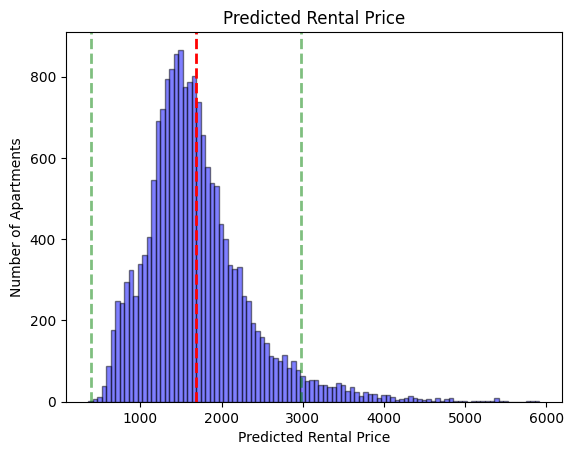

In [26]:
import matplotlib.pyplot as plt

prediction_values = data['rent']

mean_value = prediction_values.mean()
std_dev = prediction_values.std()

# Plotting the histogram
plt.hist(prediction_values, bins=100, alpha=0.5, color='blue', edgecolor='black', label='Predictions')

# Plotting vertical lines for mean and 2 std dev
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_value + 2 * std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean + 2 Std Dev', alpha=0.5)
plt.axvline(mean_value - 2 * std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean - 2 Std Dev', alpha=0.5)

plt.title('Predicted Rental Price')
plt.xlabel('Predicted Rental Price')
plt.ylabel('Number of Apartments')


plt.show()

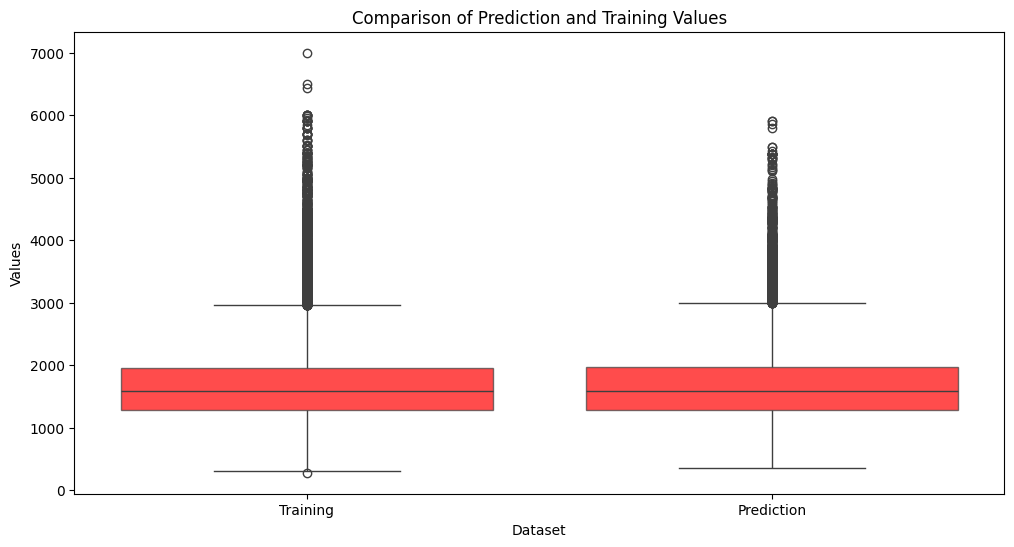

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data['rent'] is your dataset, and 'full_rent' is one of the columns
prediction_values = data['rent']
train_values = y_train  # Replace 'full_rent' with the actual column name

# Combine the data into a DataFrame
combined_data = pd.DataFrame({'Dataset': ['Prediction'] * len(prediction_values) + ['Training'] * len(train_values),
                              'Values': pd.concat([prediction_values, train_values])})

# Create side-by-side box plots
plt.figure(figsize=(12, 6))

# Set box properties including alpha for transparency
box_props = dict(facecolor="red", alpha=0.7)  # Change the color for training data
sns.boxplot(x='Dataset', y='Values', data=combined_data, order=['Training', 'Prediction'], boxprops=dict(**box_props))

# Adding labels and title

plt.ylabel('Values')
plt.title('Comparison of Prediction and Training Values')

# Show the plot
plt.show()

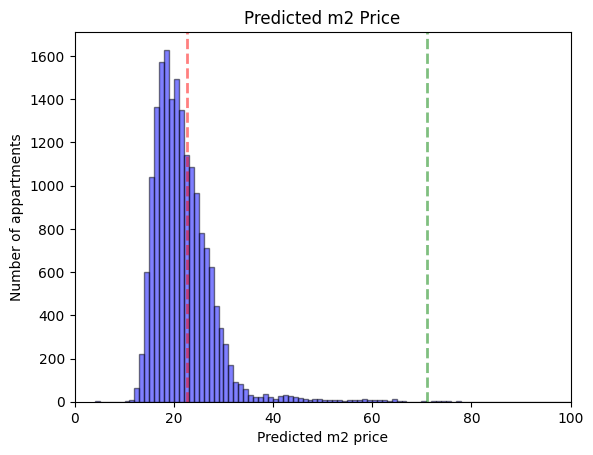

In [28]:
# Display price m2 to show outliers in prediction 

prediction_values = data['price_m2']

mean_value = prediction_values.mean()
std_dev = prediction_values.std()

# Plotting the histogram
plt.hist(prediction_values, bins=1000, alpha=0.5, color='blue', edgecolor='black',  label='Predictions')
#plt.hist(train_data['rent_full'], bins=100, alpha=0.2, color='red', edgecolor='black', density=True , label='Train Data')

# Plotting mean line
plt.axvline(mean_value, color='red', alpha=0.5, linestyle='dashed', linewidth=2, label='Mean')



# Plotting lines for +/- 2 standard deviations
plt.axvline(mean_value - 2 * std_dev, color='green', alpha=0.5, linestyle='dashed', linewidth=2, label='-2 Std Dev')
plt.axvline(mean_value + 2 * std_dev, color='green', alpha=0.5, linestyle='dashed', linewidth=2, label='+2 Std Dev')

plt.xlim(0,100)

plt.title('Predicted m2 Price')
plt.xlabel('Predicted m2 price')
plt.ylabel('Number of appartments')
plt.show()

In [29]:
data['price_m2_log'] = np.log1p(data['price_m2'])

mean_value_log = data['price_m2_log'].mean()
std_dev_log = data['price_m2_log'].std()

data['price_m2_log'].head(5)

0    3.153507
1    3.273400
2    3.075185
3    2.895735
4    3.901359
Name: price_m2_log, dtype: float64

In [30]:


# Find entries higher than 2 standard deviations
outliers = data[data['price_m2'] > mean_value + 2 * std_dev]
print(mean_value + 2 * std_dev)

# Count and display outliers
count_outliers = outliers.shape[0]
print(f"Number of entries higher than 2 std dev: {count_outliers}")

# Display min_area and year_built of outliers, sorted by min_area and year_built
if count_outliers > 0:
    outliers_sorted = outliers[['min_area', 'year_built', 'price_m2']].sort_values(by=['min_area', 'year_built'])
    print("\nValues of the Outliers for 'min_area' and 'year_built' (Sorted):")
    print(outliers_sorted)

70.98739336128807
Number of entries higher than 2 std dev: 39

Values of the Outliers for 'min_area' and 'year_built' (Sorted):
        min_area   year_built     price_m2
3470    1.000000  1942.745938   880.129460
10601   1.000000  1942.814574   978.844900
1599    1.000000  1942.815241   780.395300
13877   1.000000  1952.000000   827.040400
10275   1.000000  1957.634789   683.587340
6989    1.000000  1958.664412   834.295300
6523    1.000000  1959.069219   737.364700
16914   1.000000  1965.871663   667.943700
7658    1.000000  1973.073333   946.162300
299     1.000000  1973.961096   871.954300
3958    1.000000  1981.491717   840.554440
9769    1.000000  1982.743770  1001.414700
16385   1.000000  1993.938881   556.337500
6638    1.000000  1994.938933   596.603150
9858    1.000000  2006.364958   629.770140
14352   1.000000  2015.000000   813.142500
7057    4.000000  1904.000000   187.448225
14934   4.000000  1942.909199   231.247512
13401   5.000000  1979.912221   140.096120
16523   6.00

In [31]:
filtered_data = data[data['price_m2'] < 10]

# Sort the filtered_data by 'min_area' and 'year_built'
sorted_data = filtered_data.sort_values(by=['min_area', 'year_built'])

# Display 'min_area', 'year_built', and 'price_m2' for the sorted rows
if not sorted_data.empty:
    print("\nValues of 'min_area', 'year_built', and 'price_m2' for rows where 'price_m2' < 15 (Sorted):")
    print(sorted_data[['min_area', 'year_built', 'price_m2']])
else:
    print("No rows found where 'price_m2' < 15")


Values of 'min_area', 'year_built', and 'price_m2' for rows where 'price_m2' < 15 (Sorted):
       min_area   year_built  price_m2
4303      400.0  1973.854401  9.066854
16834     752.0  1967.939102  5.793287
6501      802.0  1979.754180  4.093684
9678      815.0  1982.076086  4.300498
7834      903.0  1988.068036  4.243529
